The following is my entry to an old Kaggle competition on the Ames Housing Data.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
The competition focuses on data cleaning, feature engineering, and linear regression. 

In [1]:
\c 100 100
\cd C:\q\w32\

/ Import Python libraries
\l p.q
/import several ml libraries
\l quantQ\lib\quantQjupyterq.q
\l mlnotebooks\utils\graphics.q
\l automl\automl.q


\l ml\ml.q

\l mlnotebooks\utils\graphics.q
\l mlnotebooks\utils\util.q
/Fun Q ml library
\l funq\funqJQ.q
/graphing 
\l embedPy\examples\importmatplotlib.q
plt:.matplotlib.pyplot[]




Welcome to quantQ
   ____ \ \   
  / ___| \ \  
 | |_| |  ) )   
  \__  | / /   
     |_|/ /     

For available sub-namespaces, type key`.quantQ:
()

For functions in a namespace, type .e.g \f .quantQ.rf



In [2]:
//Import testing data table
show 20#tTest:("FFSFFSSSSSSSSSSSSFFFFSSSSSFSSSSSSSFSFFFSSSSFFFFFFFFFFSFSFSSFSFFSSSFFFFFFSSSFFFSS";enlist",") 0: `:C:/MLProjects/HousePrices/test.csv

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour Utilities LotConfi..
-------------------------------------------------------------------------------------------------..
1461 20         RH       80          11622   Pave   NA    Reg      Lvl         AllPub    Inside  ..
1462 20         RL       81          14267   Pave   NA    IR1      Lvl         AllPub    Corner  ..
1463 60         RL       74          13830   Pave   NA    IR1      Lvl         AllPub    Inside  ..
1464 60         RL       78          9978    Pave   NA    IR1      Lvl         AllPub    Inside  ..
1465 120        RL       43          5005    Pave   NA    IR1      HLS         AllPub    Inside  ..
1466 60         RL       75          10000   Pave   NA    IR1      Lvl         AllPub    Corner  ..
1467 20         RL                   7980    Pave   NA    IR1      Lvl         AllPub    Inside  ..
1468 60         RL       63          8402    Pave   NA    IR1      Lvl         AllPub    Inside  ..


In [3]:
//import training data 
show 20#t:("FFSFFSSSSSSSSSSSSFFFFSSSSSFSSSSSSSFSFFFSSSSFFFFFFFFFFSFSFSSFSFFSSSFFFFFFSSSFFFSSF";enlist",") 0: `:C:/MLProjects/HousePrices/train.csv

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour Utilities LotConfig ..
-------------------------------------------------------------------------------------------------..
1  60         RL       65          8450    Pave   NA    Reg      Lvl         AllPub    Inside    ..
2  20         RL       80          9600    Pave   NA    Reg      Lvl         AllPub    FR2       ..
3  60         RL       68          11250   Pave   NA    IR1      Lvl         AllPub    Inside    ..
4  70         RL       60          9550    Pave   NA    IR1      Lvl         AllPub    Corner    ..
5  60         RL       84          14260   Pave   NA    IR1      Lvl         AllPub    FR2       ..
6  50         RL       85          14115   Pave   NA    IR1      Lvl         AllPub    Inside    ..
7  20         RL       75          10084   Pave   NA    Reg      Lvl         AllPub    Inside    ..
8  60         RL                   10382   Pave   NA    IR1      Lvl         AllPub    Corner    ..


In [5]:
/Data Exploration for null values
/nulltablefunction:{![x;();0b;( cols x)!((count cols x)#0N)]}

nullExplore:flip `columnName`nullCount!(key;value)@\:sum null t
select from nullExplore where nullCount >0

columnName  nullCount
---------------------
LotFrontage 259      
MasVnrArea  8        
GarageYrBlt 81       


In [6]:
/First, we deal with Masonry Veneer nulls, replace with 0

select MasVnrType, MasVnrArea from t where MasVnrArea = 0N

t: update MasVnrArea:0.0 from t where MasVnrType =`NA

nullExplore:flip `columnName`nullCount!(key;value)@\:sum null t
select from nullExplore where nullCount >0


MasVnrType MasVnrArea
---------------------
NA                   
NA                   
NA                   
NA                   
NA                   
NA                   
NA                   
NA                   


columnName  nullCount
---------------------
LotFrontage 259      
GarageYrBlt 81       


In [7]:
/LotFrontage has many nulls, lets explore lot data
//avg sale price for null group
select avg SalePrice from t where LotFrontage  = 0N
5#select LotFrontage, LotArea, LotConfig, LotShape from t where LotFrontage  = 0N
//avg sale price for not null group
select avg SalePrice from t where (LotFrontage  = 0N)=0b
5#select LotFrontage, LotArea, LotConfig, LotShape from t where (LotFrontage  = 0N)=0b

SalePrice
---------
181620.1 


LotFrontage LotArea LotConfig LotShape
--------------------------------------
            10382   Corner    IR1     
            12968   Inside    IR2     
            10920   Corner    IR1     
            11241   CulDSac   IR1     
            8246    Inside    IR1     


SalePrice
---------
180770.5 


LotFrontage LotArea LotConfig LotShape
--------------------------------------
65          8450    Inside    Reg     
80          9600    FR2       Reg     
68          11250   Inside    IR1     
60          9550    Corner    IR1     
84          14260   FR2       IR1     


In [8]:
/explore possible pattern for LotFrontage nulls
avg select LotArea from t 
med select LotArea from t
avg select SalePrice from t
"Where LotFrontage has missing values:"
avg select LotArea from t where LotFrontage = 0N
med select LotArea from t where LotFrontage = 0N
avg select SalePrice from t where LotFrontage = 0N

LotArea| 10516.83


LotArea| 9478.5


SalePrice| 180921.2


"Where LotFrontage has missing values:"


LotArea| 13137.37


LotArea| 10624


SalePrice| 181620.1


In [9]:
/LotFrontage nulls have no effect on avg SalePrice, though 30% increase on LotArea avg, 10% on LotArea med
/Replace null values with median
medfrontage:med exec LotFrontage from t
t:update medfrontage^LotFrontage from t

In [10]:
/explore garage data

select avg SalePrice from t where GarageType = `NA
5#select GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond from t where GarageYrBlt  = 0N

select avg SalePrice from t where (GarageType = `NA)=0b
5#select GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond from t where (GarageYrBlt  = 0N)=0b

SalePrice
---------
103317.3 


GarageType GarageFinish GarageCars GarageArea GarageQual GarageCond
-------------------------------------------------------------------
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        


SalePrice
---------
185479.5 


GarageType GarageFinish GarageCars GarageArea GarageQual GarageCond
-------------------------------------------------------------------
Attchd     RFn          2          548        TA         TA        
Attchd     RFn          2          460        TA         TA        
Attchd     RFn          2          608        TA         TA        
Detchd     Unf          3          642        TA         TA        
Attchd     RFn          3          836        TA         TA        


In [11]:
//GarageType nulls = no garage, clearly have a depressing effect on sale price.
//we fill with 1910, some of oldest 
update GarageYrBlt:1910f from `t where GarageYrBlt = 0n

`t


In [12]:
/
Feature Engineering:
I need to replace categorical variables with "dummy variables" 0 and 1, ordinal variables with a scale
Note: ordinal variables will have an equal distance imposed on them, though this is likely appropriate for most variables

Related Info:
GARAGE INFO: GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, GarageYrBlt  
BASEMENT INFO: BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,
BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 
\
categoricalColumns:`MSSubClass`MSZoning`Street`Alley`LotShape`LandContour`Utilities`LotConfig`LandSlope`Neighborhood`Condition1`Condition2`BldgType`HouseStyle`RoofStyle`RoofMatl`Exterior1st`Exterior2nd`MasVnrType`Foundation`Heating`CentralAir`Electrical`GarageType`GarageFinish`PavedDrive`MiscFeature`SaleType`SaleCondition
ordinalColumns:`OverallQual`OverallCond`ExterQual`ExterCond`BsmtQual`BsmtCond`BsmtExposure`BsmtFinType1`BsmtFinType2`HeatingQC`KitchenQual`Functional`FireplaceQu`GarageQual`GarageCond`PoolQC`Fence
continuousColumns:`SalePrice`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`LowQualFinSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`Bedroom`Kitchen`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`OpenPorchSF`EnclosedPorch`3SsnPorch`ScreenPorch`PoolArea`MiscVal`MoSold`YrSold
//BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 have 0 (no basement) as lowest rank, this will mess with our equidistance scale measure
//FireplaceQu,GarageQual,GarageCond,PoolQC,Fence also has 0 rank for none
//Binary Categorical needs 1 dummy column instead of 2
binaryColumn:`CentralAir
//AdditiveCategory: flat value the misc feature adds to house. Perhaps subtract from Sale Price and delete?
AdditiveColumn:`MiscVal
uselessColumn:`MoSold
otherColumn:`Id
//`YrSold`SaleCondition deserves more digging into
//Possible feature engineering:YearBuilt YearRemodAdd | BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF | all the square feet types | Fireplaces FireplaceQu | PoolArea  PoolQC | SalePrice YrSold
//`Functional has the potential to throw everything off, especially if house is: Salvage Only 
//check columns are correct
(count cols t) ~ (count categoricalColumns) + (count ordinalColumns) + (count continuousColumns) + (count otherColumn)

1b


In [13]:
//MiscFeature and MiscVal are easy to deal with. We subtract MiscValue from SalePrice and delete both columns
t:update SalePrice:SalePrice-MiscVal from t
t:delete MiscFeature,MiscVal from t

In [14]:
select SalePrice by Functional from t 
//examine Sev
//We add a 0.5 penalty to Basement SF, add to GrLivArea for PPSF
select PPSF:SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Sev
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional = `Sev, (GrLivArea+TotalBsmtSF*0.5) <3390,(GrLivArea+TotalBsmtSF*0.5) >2390
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional= `Typ,  (GrLivArea+TotalBsmtSF*0.5) <3190,(GrLivArea+TotalBsmtSF*0.5) >2590
//examine Maj2
select PPSF: SalePrice%(GrLivArea+TotalBsmtSF*0.5), (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Maj2 
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where (GrLivArea+TotalBsmtSF*0.5) <1750,(GrLivArea+TotalBsmtSF*0.5) >1350 , Functional =`Typ
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where (GrLivArea+TotalBsmtSF*0.5) <2471,(GrLivArea+TotalBsmtSF*0.5) >1871 , Functional =`Typ
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where (GrLivArea+TotalBsmtSF*0.5) <2388,(GrLivArea+TotalBsmtSF*0.5) >1788 , Functional =`Typ
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where (GrLivArea+TotalBsmtSF*0.5) <1064,(GrLivArea+TotalBsmtSF*0.5) >664 , Functional =`Typ
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where (GrLivArea+TotalBsmtSF*0.5) <1733,(GrLivArea+TotalBsmtSF*0.5) >1333 , Functional =`Typ
//examine Maj1, Mod, Min1, Min2
select Maj1PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Maj1
select ModPPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Mod
select Min2PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Min2
select Min1PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Min1
select TypPPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t where Functional =`Typ

//By examining Functional variable, we see this has a consistent %based penalty on SalePrice 
//We have no Salvage only data, but get penalty coefficients Sev=.50, Maj2=.60, Maj1=.72, Mod=.79, Min2=.79, Min1=.78

Functional| SalePrice                                                                            ..
----------| -------------------------------------------------------------------------------------..
Maj1      | 130000 315000 130000 61000 200624 213250 60000 155000 151400 137500 144000 200500 127..
Maj2      | 67000 115000 110000 52000 85000f                                                     ..
Min1      | 129900 139000 130000 180000 127000 180000 112000 134450 158000 139000 150000 122500 2..
Min2      | 184000 135000 143900 131000 130000 134432 123000 155000 316600 165150 168000 87000 17..
Mod       | 200000 76050 241500 60000 190000 160000 107500 121500 51500 98000 158700 538000 13790..
Sev       | ,129000f                                                                             ..
Typ       | 208500 181500 223500 140000 250000 142300 307000 199650 118000 129500 345000 144000 2..


PPSF     GrLivArea
------------------
44.62896 2890.5   


PPSF     GrLivArea
------------------
44.62896 2890.5   


PPSF     GrLivArea
------------------
95.35915 2835.669 


PPSF     GrLivArea
------------------
43.01766 1557.5   
52.97098 2171     
52.68199 2088     
60.18519 864      
55.44684 1533     


PPSF    GrLivArea
-----------------
84.5271 1563.601 


PPSF     GrLivArea
------------------
88.18688 2157.22  


PPSF     GrLivArea
------------------
87.54856 2073.233 


PPSF     GrLivArea
------------------
92.44583 955.0714 


PPSF     GrLivArea
------------------
85.24243 1540.986 


Maj1PPSF GrLivArea
------------------
65.27948 2361.607 


ModPPSF  GrLivArea
------------------
70.82014 2329.9   


Min2PPSF GrLivArea
------------------
70.60127 2081.735 


Min1PPSF GrLivArea
------------------
74.45906 1990.177 


TypPPSF  GrLivArea
------------------
89.13428 2038.905 


In [15]:
//By examining the Functional variable, we see this has a consistent %based penalty on SalePrice 
//We estimate penalty coefficients Sev=.5, Maj2=.60, Maj1=.72, Mod=.79, Min2=.79, Min1=.83, Typ=1
//This shows us the danger of equidistance scaling of ordinal data.
//We have no Salvage only data, but estimmate .35 as a coefficient and normalize all data to Typical
functionalDict:(`Sal`Sev`Maj2`Maj1`Mod`Min2`Min1`Typ)!(0.35,0.5,0.60,0.72,0.79,0.79,0.83,1)
t:update Functional:functionalDict(Functional) from t
10#select SalePrice from t where Functional<>1
t:update SalePrice:SalePrice%Functional from t
10#select SalePrice from t where Functional<>1
t:delete Functional from t
count cols t

SalePrice
---------
129900   
139000   
130000   
180000   
127000   
180000   
130000   
184000   
200000   
135000   


SalePrice
---------
156506   
167469.9 
156626.5 
216867.5 
153012   
216867.5 
180555.6 
232911.4 
253164.6 
170886.1 


78


In [16]:
//We Now look at MoSold, YrSold. We combine the two for a new feature: DateSold
t:update DateSold:(`month$(12*-2000+ exec YrSold from t)+-1+exec MoSold from t) from t
5#select YrSold,MoSold,DateSold from t
t:delete YrSold,MoSold from t

YrSold MoSold DateSold
----------------------
2008   2      2008.02 
2007   5      2007.05 
2008   9      2008.09 
2006   2      2006.02 
2008   12     2008.12 


In [17]:
//examine ordinary housing market, SalePrice < $350,000 by year
select PPSF: avg SalePrice%GrLivArea, avg  GrLivArea, avg SalePrice from t where SalePrice <350000, DateSold>2006.01m, DateSold<2006.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg  SalePrice from t where SalePrice <350000, DateSold>2007.01m, DateSold<2007.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice <350000, DateSold>2008.01m, DateSold<2008.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice <350000, DateSold>2009.01m, DateSold<2009.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice <350000, DateSold>2010.01m, DateSold<2010.12m
//examine Luxury housing market, SalePrice > $350,000 by year
"Luxury"
select PPSF: avg SalePrice%GrLivArea, avg  GrLivArea, avg SalePrice from t where SalePrice >350000, DateSold>2006.01m, DateSold<2006.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg  SalePrice from t where SalePrice >350000, DateSold>2007.01m, DateSold<2007.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice >350000, DateSold>2008.01m, DateSold<2008.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice >350000, DateSold>2009.01m, DateSold<2009.12m
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea, avg SalePrice from t where SalePrice >350000, DateSold>2010.01m, DateSold<2010.12m

PPSF    GrLivArea SalePrice
---------------------------
118.363 1490.263  174049.6 


PPSF     GrLivArea SalePrice
----------------------------
119.8784 1511.877  175836.6 


PPSF     GrLivArea SalePrice
----------------------------
120.7407 1458.284  172646.5 


PPSF     GrLivArea SalePrice
----------------------------
118.8839 1470.323  172128.2 


PPSF     GrLivArea SalePrice
----------------------------
120.8217 1436.868  170469.3 


"Luxury"


PPSF     GrLivArea SalePrice
----------------------------
177.9145 2548.545  440757.6 


PPSF     GrLivArea SalePrice
----------------------------
173.8791 2582.846  427935.7 


PPSF     GrLivArea SalePrice
----------------------------
181.8366 2316.25   400646.5 


PPSF     GrLivArea SalePrice
----------------------------
188.9845 2265.538  421887.3 


PPSF     GrLivArea SalePrice
----------------------------
199.4725 2449.167  478465.6 


In [18]:
//We conclude that DateSold has no meaningful contribution to the data
t:delete DateSold from t

//Next we explore SaleCondition
select avg SalePrice,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea by SaleCondition from t  
flip select from t where SaleCondition = `AdjLand
select avg SalePrice,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where BldgType = `Duplex
select avg SalePrice,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where BldgType = `1Fam
select avg SalePrice,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where Neighborhood = `Edwards
select avg SalePrice,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t 

SaleCondition| SalePrice PPSF     GrLivArea
-------------| ----------------------------
Abnorml      | 149945.5  76.53494 1436.129 
AdjLand      | 104125    73.9574  1112.5   
Alloca       | 173874.6  79.11875 1701.75  
Family       | 150808.4  74.95004 1480.95  
Normal       | 178244    88.58282 1492.968 
Partial      | 272291.8  108.7154 1795.696 


Id           | 40      387     419     955    
MSSubClass   | 90      50      50      90     
MSZoning     | RL      RL      RL      RL     
LotFrontage  | 65      58      60      35     
LotArea      | 6040    8410    8160    9400   
Street       | Pave    Pave    Pave    Pave   
Alley        | NA      NA      NA      NA     
LotShape     | Reg     Reg     Reg     IR1    
LandContour  | Lvl     Lvl     Lvl     Lvl    
Utilities    | AllPub  AllPub  AllPub  AllPub 
LotConfig    | Inside  FR2     Inside  CulDSac
LandSlope    | Gtl     Gtl     Gtl     Gtl    
Neighborhood | Edwards Edwards Edwards Edwards
Condition1   | Norm    Feedr   Norm    Norm   
Condition2   | Norm    Norm    Norm    Norm   
BldgType     | Duplex  1Fam    1Fam    Duplex 
HouseStyle   | 1Story  1.5Fin  1.5Fin  SFoyer 
OverallQual  | 4       5       5       6      
OverallCond  | 5       3       6       5      
YearBuilt    | 1955    1910    1940    1975   
YearRemodAdd | 1955    1996    1950    1975   
RoofStyle    

SalePrice PPSF     GrLivArea
----------------------------
133994.2  69.21553 1567.308 


SalePrice PPSF     GrLivArea
----------------------------
188722.9  89.88276 1539.493 


SalePrice PPSF     GrLivArea
----------------------------
133039.6  78.52712 1340.04  


SalePrice PPSF     GrLivArea
----------------------------
183723.6  89.16845 1515.464 


In [19]:
//Explore SaleCondition=`Partial by controlling for Yearbuilt
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg YearBuilt from t where SaleCondition=`Partial
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg YearBuilt from t where SaleCondition=`Normal, YearBuilt>1997



PPSF     YearBuilt
------------------
108.7154 2005.2   


PPSF     YearBuilt
------------------
100.0273 2003.02  


In [20]:
//Partial is associated with New Homes, explaining the premium. SaleType=`New and Yearbuilt will add our premiums for us
//AdjLand is associated with Neighborhood=Edwards, BldgType=Duplex,so no penalty
//Alloca is associated with Duplexes, which as a lower price per square foot, so no penalty
// Abnorm1, Family are associated with buying property cheaply, so we apply penalties.
SaleConditionDict:(`Abnorml`AdjLand`Alloca`Family`Normal`Partial)!(0.88,1,1,0.87,1,1)

t:update SaleCondition:SaleConditionDict(exec SaleCondition from t) from t
10#select SalePrice,SaleCondition from t where SaleCondition<>1
t:update SalePrice:SalePrice%SaleCondition from t
10#select SalePrice from t where SaleCondition<>1
t:delete SaleCondition from t
count cols t

SalePrice SaleCondition
-----------------------
140000    0.88         
156506    0.88         
167469.9  0.88         
109000    0.88         
160000    0.88         
239686    0.88         
172500    0.88         
85000     0.88         
98600     0.88         
82600     0.88         


SalePrice
---------
159090.9 
177847.8 
190306.7 
123863.6 
181818.2 
272370.5 
196022.7 
96590.91 
112045.5 
93863.64 


75


{[f;x]embedPy[f;x]}[foreign]enlist


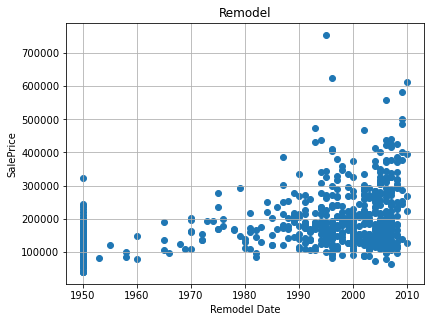

YearRemodAdd SalePrice PPSF    
-------------------------------
1986.667     184758.1  119.0897


{[f;x]embedPy[f;x]}[foreign]enlist


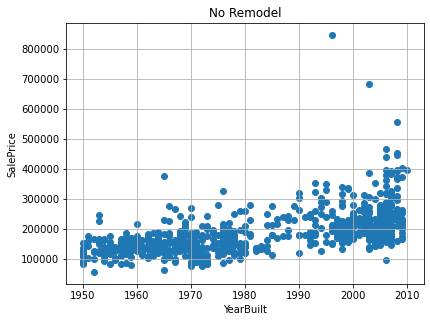

YearRemodAdd SalePrice PPSF    
-------------------------------
1983.225     186074.2  127.5133


{[f;x]embedPy[f;x]}[foreign]enlist


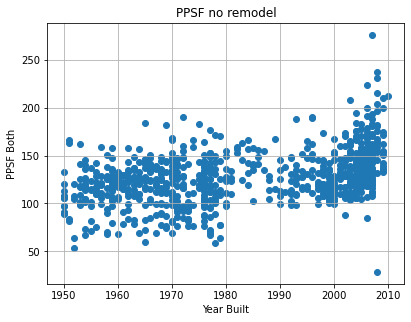

{[f;x]embedPy[f;x]}[foreign]enlist


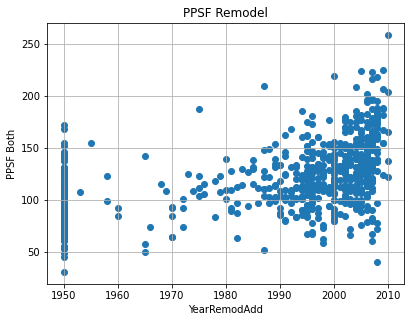

In [21]:
//Investigate YearBuilt, YearRemodAdd
plt.xlabel"Remodel Date";
plt.ylabel"SalePrice";
plt.title"Remodel";
plt.grid 1b;
plt.scatter[exec YearRemodAdd from t where YearRemodAdd<>YearBuilt;  exec SalePrice from t where YearRemodAdd<>YearBuilt]
plt.show[];
select avg YearRemodAdd, avg SalePrice, PPSF: avg SalePrice%GrLivArea from t where YearRemodAdd<>YearBuilt

plt.xlabel"YearBuilt";
plt.ylabel"SalePrice";
plt.title"No Remodel";
plt.grid 1b;
plt.scatter[exec YearBuilt from t where YearRemodAdd=YearBuilt; exec SalePrice from t where YearRemodAdd=YearBuilt]
plt.show[];
select avg YearRemodAdd, avg SalePrice, PPSF: avg SalePrice%GrLivArea from t where YearRemodAdd=YearBuilt

plt.xlabel"Year Built";
plt.ylabel"PPSF Both";
plt.title"PPSF no remodel";
plt.grid 1b;
plt.scatter[raze exec YearBuilt from t where YearRemodAdd=YearBuilt; raze exec PPSF:SalePrice%GrLivArea from t where YearRemodAdd=YearBuilt]
plt.show[];


plt.xlabel"YearRemodAdd";
plt.ylabel"PPSF Both";
plt.title"PPSF Remodel";
plt.grid 1b;
plt.scatter[raze exec YearRemodAdd from t where YearRemodAdd<>YearBuilt;  raze exec PPSF:SalePrice%GrLivArea from t where YearRemodAdd<>YearBuilt]
plt.show[];


In [22]:
//YearRemodAdd censors YearBuilt where houses are built before 1950


{[f;x]embedPy[f;x]}[foreign]enlist


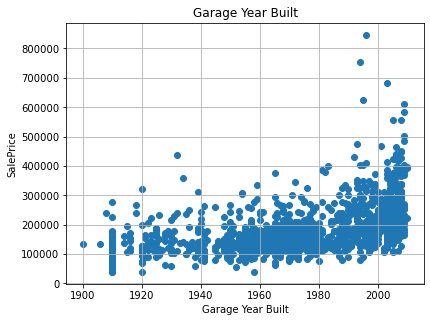

{[f;x]embedPy[f;x]}[foreign]enlist


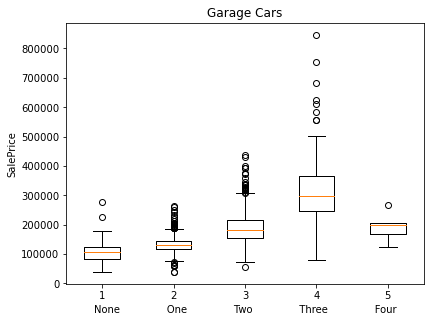

{[f;x]embedPy[f;x]}[foreign]enlist


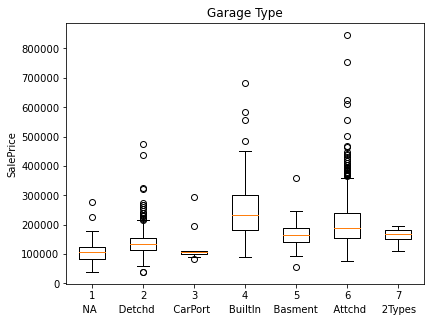

{[f;x]embedPy[f;x]}[foreign]enlist


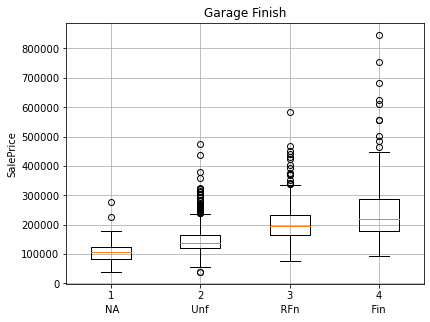

{[f;x]embedPy[f;x]}[foreign]enlist


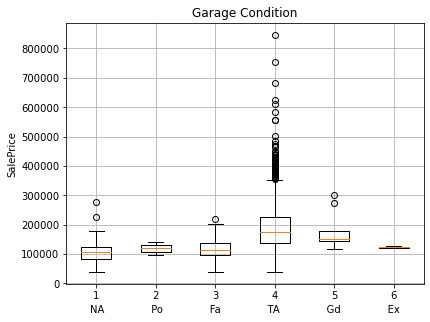

{[f;x]embedPy[f;x]}[foreign]enlist


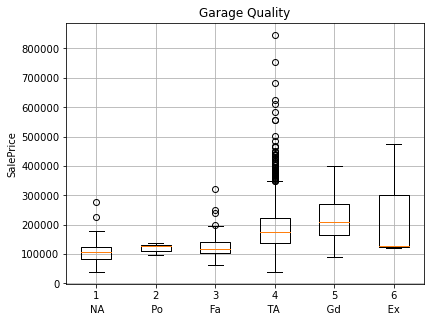

{[f;x]embedPy[f;x]}[foreign]enlist


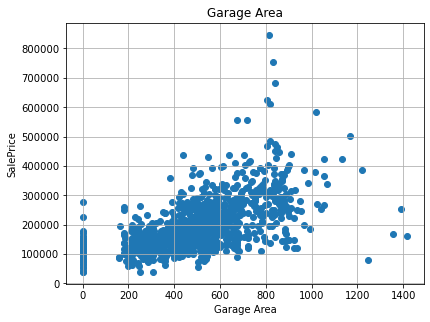

In [23]:
//We now explore garage data
//GARAGE INFO: GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, GarageYrBlt  
plt.xlabel"Garage Year Built";
plt.ylabel"SalePrice";
plt.title"Garage Year Built";
plt.grid 1b;
plt.scatter[exec GarageYrBlt from t; exec SalePrice from t]
plt.show[];

plt.xlabel"None               One               Two               Three               Four";
plt.ylabel"SalePrice";
plt.title"Garage Cars";
plt.boxplot[(exec SalePrice from t where GarageCars=0;exec SalePrice from t where GarageCars=1;exec SalePrice from t where GarageCars=2;exec SalePrice from t where GarageCars=3;exec SalePrice from t where GarageCars=4)]
plt.show[];

plt.xlabel"   NA       Detchd      CarPort      BuiltIn    Basment     Attchd     2Types";
plt.ylabel"SalePrice";
plt.title"Garage Type";
plt.boxplot[(exec SalePrice from t where GarageType=`NA;exec SalePrice from t where GarageType=`Detchd;exec SalePrice from t where GarageType=`CarPort;exec SalePrice from t where GarageType=`BuiltIn;exec SalePrice from t where GarageType=`Basment;exec SalePrice from t where GarageType=`Attchd;exec SalePrice from t where GarageType=`2Types)]
plt.show[];

plt.xlabel"NA                       Unf                       RFn                       Fin";
plt.ylabel"SalePrice";
plt.title"Garage Finish";
plt.grid 1b;
plt.boxplot[(exec SalePrice from t where GarageFinish=`NA;exec SalePrice from t where GarageFinish=`Unf;exec SalePrice from t where GarageFinish=`RFn;exec SalePrice from t where GarageFinish=`Fin)]
plt.show[];

plt.xlabel"NA               Po               Fa               TA               Gd               Ex";
plt.ylabel"SalePrice";
plt.title"Garage Condition";
plt.grid 1b;
plt.boxplot[(exec SalePrice from t where GarageCond=`NA;exec SalePrice from t where GarageCond=`Po;exec SalePrice from t where GarageCond=`Fa;exec SalePrice from t where GarageCond=`TA;exec SalePrice from t where GarageCond=`Gd;exec SalePrice from t where GarageCond=`Ex)]
plt.show[];

plt.xlabel"NA               Po               Fa               TA               Gd               Ex";
plt.ylabel"SalePrice";
plt.title"Garage Quality";
plt.grid 1b;
plt.boxplot[(exec SalePrice from t where GarageQual=`NA;exec SalePrice from t where GarageQual=`Po;exec SalePrice from t where GarageQual=`Fa;exec SalePrice from t where GarageQual=`TA;exec SalePrice from t where GarageQual=`Gd;exec SalePrice from t where GarageQual=`Ex)]
plt.show[];

plt.xlabel"Garage Area";
plt.ylabel"SalePrice";
plt.title"Garage Area";
plt.grid 1b;
plt.scatter[exec GarageArea from t;exec SalePrice from t]
plt.show[];

`t


`t


`t


`t


`t


`t


{[f;x]embedPy[f;x]}[foreign]enlist


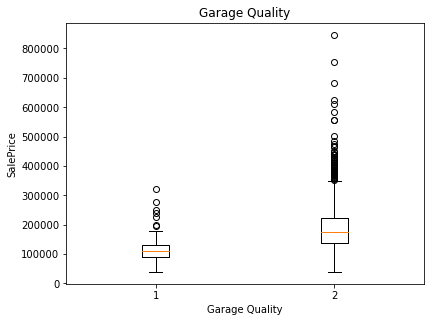

{[f;x]embedPy[f;x]}[foreign]enlist


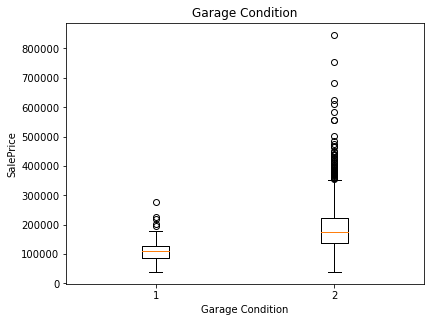

In [24]:
//GarageCond and GarageQual are ordinal, but dip towards the end. I will cluster and hot encode the variables
update GarageCondGood:1 from `t where (GarageCond=`TA)or (GarageCond=`Ex)or (GarageCond=`Gd)
update GarageCondGood:0 from `t where (GarageCond=`Fa) or (GarageCond=`NA)or (GarageCond=`Po)
delete GarageCond from `t

update GarageQualGood:1 from `t where (GarageQual=`TA)or (GarageQual=`Ex)or (GarageQual=`Gd)
update GarageQualGood:0 from `t where (GarageQual=`Fa) or (GarageQual=`NA)or (GarageQual=`Po)
delete GarageQual from `t



plt.xlabel"Garage Quality";
plt.ylabel"SalePrice";
plt.title"Garage Quality";
plt.boxplot[(exec SalePrice from t where GarageQualGood=0;exec SalePrice from t where GarageQualGood=1)]
plt.show[];

plt.xlabel"Garage Condition";
plt.ylabel"SalePrice";
plt.title"Garage Condition";
plt.boxplot[(exec SalePrice from t where GarageCondGood=0;exec SalePrice from t where GarageCondGood=1)]
plt.show[];

//Granted, this binning shows SalePrice of homes with no garage packed in with the poor Garages. 
//We will split housing data into Garage/No Garage later

In [25]:
//Check Utilities
select Utilities from t where Utilities <> `AllPub
flip select from t where Utilities <> `AllPub
select PPSF:SalePrice%GrLivArea from t where Utilities <> `AllPub
select PPSF:avg SalePrice % GrLivArea from t 


Utilities
---------
NoSeWa   


Id            | 945    
MSSubClass    | 20     
MSZoning      | RL     
LotFrontage   | 63     
LotArea       | 14375  
Street        | Pave   
Alley         | NA     
LotShape      | IR1    
LandContour   | Lvl    
Utilities     | NoSeWa 
LotConfig     | CulDSac
LandSlope     | Gtl    
Neighborhood  | Timber 
Condition1    | Norm   
Condition2    | Norm   
BldgType      | 1Fam   
HouseStyle    | SLvl   
OverallQual   | 6      
OverallCond   | 6      
YearBuilt     | 1958   
YearRemodAdd  | 1958   
RoofStyle     | Gable  
RoofMatl      | CompShg
Exterior1st   | HdBoard
Exterior2nd   | HdBoard
MasVnrType    | BrkFace
MasVnrArea    | 541    
ExterQual     | TA     
ExterCond     | TA     
Foundation    | CBlock 
BsmtQual      | TA     
BsmtCond      | TA     
BsmtExposure  | No     
BsmtFinType1  | GLQ    
BsmtFinSF1    | 111    
BsmtFinType2  | Rec    
BsmtFinSF2    | 354    
BsmtUnfSF     | 354    
TotalBsmtSF   | 819    
Heating       | GasA   
HeatingQC     | Gd     
CentralAir    | 

PPSF    
--------
116.2574


PPSF    
--------
123.4977


In [26]:
//Since Utilities only has one deviant which seemingly has no effect on Price Per Square Foot, we delete the category
t:delete Utilities from t
flip select from t where Street <>`Pave
select PPSF:avg SalePrice%GrLivArea from t where Street <>`Pave
select PPSF:avg SalePrice%GrLivArea from t where Street =`Pave
select PPSF:avg SalePrice%GrLivArea from t where YearRemodAdd <1970

//Although houses with Gravel streets have a lower PPSF, they have an underlying variable of being old. We will delete Street
t:delete Street from t

Id            | 53      336     583     813     1062    1185   
MSSubClass    | 90      190     90      20      30      20     
MSZoning      | RM      RL      RL      C (all) C (all) RL     
LotFrontage   | 110     63      81      66      120     50     
LotArea       | 8472    164660  11841   8712    18000   35133  
Street        | Grvl    Grvl    Grvl    Grvl    Grvl    Grvl   
Alley         | NA      NA      NA      NA      NA      NA     
LotShape      | IR2     IR1     Reg     Reg     Reg     Reg    
LandContour   | Bnk     HLS     Lvl     Bnk     Low     Lvl    
LotConfig     | Corner  Corner  Inside  Inside  Inside  Inside 
LandSlope     | Mod     Sev     Gtl     Mod     Gtl     Mod    
Neighborhood  | IDOTRR  Timber  Edwards IDOTRR  IDOTRR  Timber 
Condition1    | RRNn    Norm    Norm    Norm    Norm    Norm   
Condition2    | Norm    Norm    Norm    Norm    Norm    Norm   
BldgType      | Duplex  2fmCon  Duplex  1Fam    1Fam    1Fam   
HouseStyle    | 1Story  1.5Fin  SFoyer  

PPSF    
--------
111.6915


PPSF    
--------
123.5464


PPSF    
--------
107.5697


{[f;x]embedPy[f;x]}[foreign]enlist


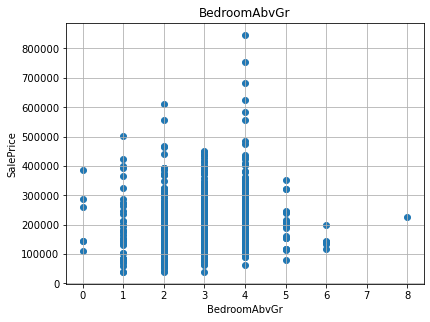

In [27]:
//explore BedroomAbvGr 
plt.xlabel"BedroomAbvGr";
plt.ylabel"SalePrice";
plt.title"BedroomAbvGr";
plt.grid 1b;
plt.scatter[exec BedroomAbvGr from t;exec SalePrice from t]
plt.show[];


{[f;x]embedPy[f;x]}[foreign]enlist


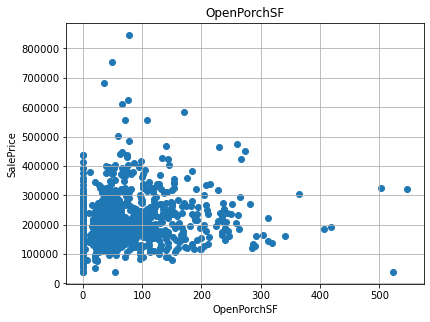

{[f;x]embedPy[f;x]}[foreign]enlist


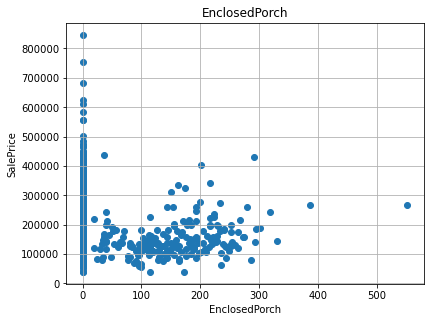

{[f;x]embedPy[f;x]}[foreign]enlist


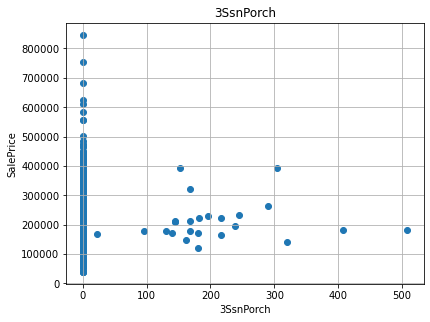

{[f;x]embedPy[f;x]}[foreign]enlist


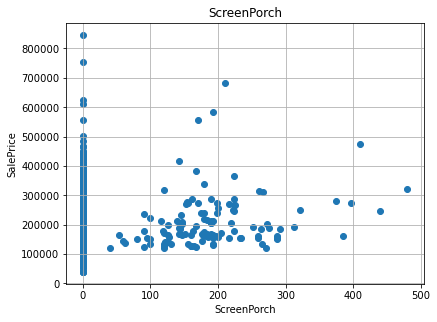

{[f;x]embedPy[f;x]}[foreign]enlist


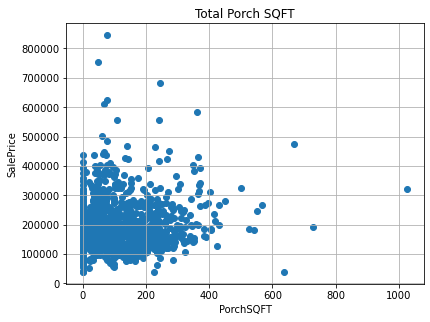

1002


In [28]:
//explore Porch data
//select statement doesn't like 3SsnPorch because it begins with a number
/(`OpenPorchSF`EnclosedPorch`3SsnPorch`ScreenPorch)#t
plt.xlabel"OpenPorchSF";
plt.ylabel"SalePrice";
plt.title"OpenPorchSF";
plt.grid 1b;
plt.scatter[exec OpenPorchSF from t;exec SalePrice from t]
plt.show[];

plt.xlabel"EnclosedPorch";
plt.ylabel"SalePrice";
plt.title"EnclosedPorch";
plt.grid 1b;
plt.scatter[exec EnclosedPorch from t;exec SalePrice from t]
plt.show[];

plt.xlabel"3SsnPorch";
plt.ylabel"SalePrice";
plt.title"3SsnPorch";
plt.grid 1b;
plt.scatter[(flip (`3SsnPorch`ScreenPorch)#t)(`3SsnPorch); exec SalePrice from t]
plt.show[];

plt.xlabel"ScreenPorch";
plt.ylabel"SalePrice";
plt.title"ScreenPorch";
plt.grid 1b;
plt.scatter[exec ScreenPorch from t;exec SalePrice from t]
plt.show[];

//We sum all the porch data together for a new variable

t:update PorchSQFT:sum(exec OpenPorchSF from t;exec EnclosedPorch from t;(flip (`3SsnPorch`ScreenPorch)#t)(`3SsnPorch);exec ScreenPorch from t) from t
plt.xlabel"PorchSQFT";
plt.ylabel"SalePrice";
plt.title"Total Porch SQFT";
plt.grid 1b;
plt.scatter[exec PorchSQFT from t;exec SalePrice from t]
plt.show[];

t:flip (flip t)_(`3SsnPorch)
t:delete ScreenPorch,EnclosedPorch,OpenPorchSF from t
count select from t where PorchSQFT<>0


{[f;x]embedPy[f;x]}[foreign]enlist


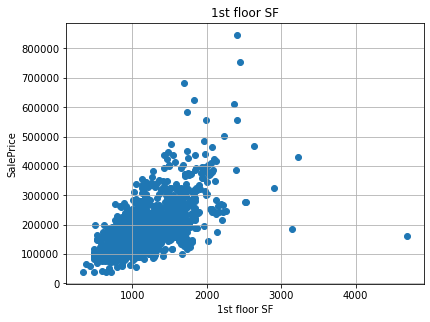

{[f;x]embedPy[f;x]}[foreign]enlist


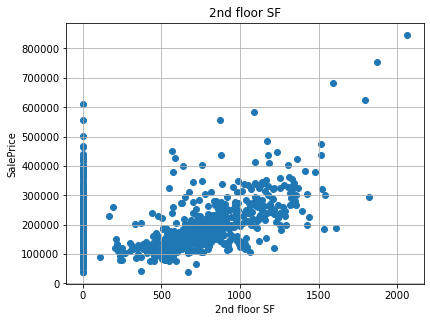

1b


{[f;x]embedPy[f;x]}[foreign]enlist


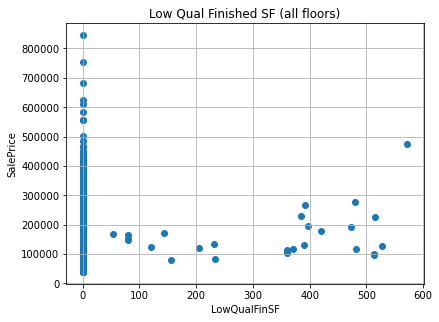

{[f;x]embedPy[f;x]}[foreign]enlist


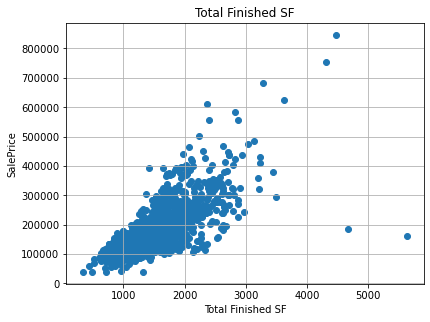

{[f;x]embedPy[f;x]}[foreign]enlist


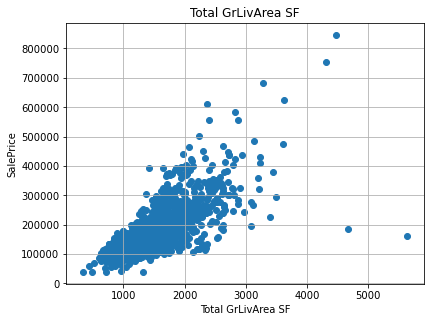

In [29]:
//explore 1st and 2nd floor data 

plt.xlabel"1st floor SF";
plt.ylabel"SalePrice";
plt.title"1st floor SF";
plt.grid 1b;
plt.scatter[t[`1stFlrSF];exec SalePrice from t]
plt.show[];

plt.xlabel"2nd floor SF";
plt.ylabel"SalePrice";
plt.title"2nd floor SF";
plt.grid 1b;
plt.scatter[t[`2ndFlrSF];exec SalePrice from t]
plt.show[];

((exec LowQualFinSF from t)+(t[`2ndFlrSF]+t[`1stFlrSF])) ~ (exec GrLivArea from t)
//LowQualFinSF + 2ndFlrSF + 1stFlrSF = GrLivArea


plt.xlabel"LowQualFinSF";
plt.ylabel"SalePrice";
plt.title"Low Qual Finished SF (all floors)";
plt.grid 1b;
plt.scatter[exec LowQualFinSF from t ;exec SalePrice from t]
plt.show[];

plt.xlabel"Total Finished SF";
plt.ylabel"SalePrice";
plt.title"Total Finished SF";
plt.grid 1b;
plt.scatter[t[`2ndFlrSF] +t[`1stFlrSF] ;exec SalePrice from t]
plt.show[];

plt.xlabel"Total GrLivArea SF";
plt.ylabel"SalePrice";
plt.title"Total GrLivArea SF";
plt.grid 1b;
plt.scatter[exec GrLivArea from t ;exec SalePrice from t]
plt.show[];



In [30]:
//the premium on space on second floor is likely caused by lurking varibles, such as location
//Due to the high number of 0s, 2ndFlrSF may be misleading
//LowQualFinSF does not have correlation with Price, I will delete
//because GrLivArea is simply addition of two columns, we may consider deleting after data analysis

/update GrLivArea: GrLivArea - LowQualFinSF from `t;
delete LowQualFinSF from `t


`t


In [31]:
//zoom in on the two bottom outliers
flip select from t where GrLivArea > 4000,SalePrice<300000

Id            | 524     1299   
MSSubClass    | 60      60     
MSZoning      | RL      RL     
LotFrontage   | 130     313    
LotArea       | 40094   63887  
Alley         | NA      NA     
LotShape      | IR1     IR3    
LandContour   | Bnk     Bnk    
LotConfig     | Inside  Corner 
LandSlope     | Gtl     Gtl    
Neighborhood  | Edwards Edwards
Condition1    | PosN    Feedr  
Condition2    | PosN    Norm   
BldgType      | 1Fam    1Fam   
HouseStyle    | 2Story  2Story 
OverallQual   | 10      10     
OverallCond   | 5       5      
YearBuilt     | 2007    2008   
YearRemodAdd  | 2008    2008   
RoofStyle     | Hip     Hip    
RoofMatl      | CompShg ClyTile
Exterior1st   | CemntBd Stucco 
Exterior2nd   | CmentBd Stucco 
MasVnrType    | Stone   Stone  
MasVnrArea    | 762     796    
ExterQual     | Ex      Ex     
ExterCond     | TA      TA     
Foundation    | PConc   PConc  
BsmtQual      | Ex      Ex     
BsmtCond      | TA      TA     
BsmtExposure  | Gd      Gd     
BsmtFinT

In [32]:
//On paper, these should be very expensive houses. We will delete the outliers
delete from `t where  Id =524
delete from `t where  Id =1299
count t

`t


`t


1458


{[f;x]embedPy[f;x]}[foreign]enlist


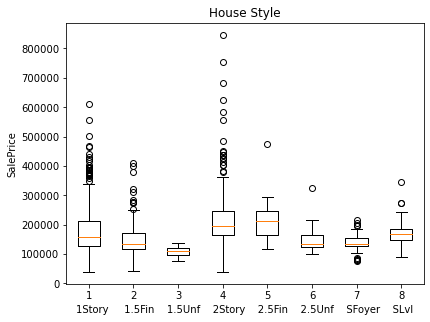

{[f;x]embedPy[f;x]}[foreign]enlist


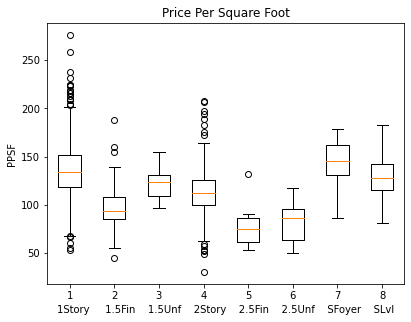

HouseStyle| Total
----------| -----
1.5Fin    | 154  
1.5Unf    | 14   
1Story    | 726  
2.5Fin    | 8    
2.5Unf    | 11   
2Story    | 443  
SFoyer    | 37   
SLvl      | 65   


HouseStyle| PPSF     GrLivArea
----------| ------------------
1.5Fin    | 96.06483 1564.948 
1.5Unf    | 123.0228 896.4286 
1Story    | 135.8231 1308.599 
2.5Fin    | 78.13549 2848     
2.5Unf    | 82.4879  1907.636 
2Story    | 112.5101 1872.641 
SFoyer    | 144.8824 973.3784 
SLvl      | 128.9195 1373.862 


In [33]:
//explore House Style, Neighborhood
plt.ylabel"SalePrice";
plt.xlabel"1Story     1.5Fin    1.5Unf    2Story    2.5Fin    2.5Unf    SFoyer    SLvl";
plt.title"House Style";
plt.boxplot[(exec SalePrice from t where HouseStyle=`1Story;exec SalePrice from t where HouseStyle=`1.5Fin;exec SalePrice from t where HouseStyle=`1.5Unf;exec SalePrice from t where HouseStyle=`2Story;exec SalePrice from t where HouseStyle=`2.5Fin;exec SalePrice from t where HouseStyle=`2.5Unf;exec SalePrice from t where HouseStyle=`SFoyer;exec SalePrice from t where HouseStyle=`SLvl)]
plt.show[];

plt.ylabel"PPSF";
plt.xlabel"1Story     1.5Fin    1.5Unf    2Story    2.5Fin    2.5Unf    SFoyer    SLvl";
plt.title"Price Per Square Foot";
plt.boxplot[(exec SalePrice%GrLivArea from t where HouseStyle=`1Story;exec SalePrice%GrLivArea from t where HouseStyle=`1.5Fin;exec SalePrice%GrLivArea from t where HouseStyle=`1.5Unf;exec SalePrice%GrLivArea from t where HouseStyle=`2Story;exec SalePrice%GrLivArea from t where HouseStyle=`2.5Fin;exec SalePrice%GrLivArea from t where HouseStyle=`2.5Unf;exec SalePrice%GrLivArea from t where HouseStyle=`SFoyer;exec SalePrice%GrLivArea from t where HouseStyle=`SLvl)]
plt.show[];
select Total:(count Id) by HouseStyle from t
select PPSF: avg SalePrice%GrLivArea, avg GrLivArea by HouseStyle from t



In [34]:
//We will cluster lower observation columns based on PPSF
//1.5Unf, 2.5Fin, 2.5Unf joins 2Story, 
update HouseStyle:`2Story from `t where HouseStyle=`1.5Unf
update HouseStyle:`2Story from `t where HouseStyle=`2.5Fin
update HouseStyle:`2Story from `t where HouseStyle=`2.5Unf

`t


`t


`t


Neighborhood| SalePrice PPSF    
------------| ------------------
MeadowV     | 102777.8  104.4714
IDOTRR      | 103596.8  92.48575
BrDale      | 110946.1  97.13506
BrkSide     | 129375    110.2931
Edwards     | 133416.1  107.6236
OldTown     | 135125    95.95276
Blueste     | 137500    98.96937
Sawyer      | 144238.8  123.0287
NPkVill     | 144815.7  118.7112
SWISU       | 151560.1  89.33976
NAmes       | 151837.5  120.2893
Mitchel     | 160738.6  128.5918
SawyerW     | 189684.4  121.5333
Gilbert     | 194061.1  119.8521
NWAmes      | 194434.7  115.2522
Blmngtn     | 194870.9  136.567 
CollgCr     | 198461.2  137.1483
Crawfor     | 218830.9  124.302 
Somerst     | 226634.9  142.1552
ClearCr     | 228150.6  133.1029
Veenker     | 238772.7  154.9809
Timber      | 246529.9  142.1857
NridgHt     | 316270.6  164.5781
StoneBr     | 318942.2  168.7123
NoRidge     | 340626.8  133.9963


{[f;x]embedPy[f;x]}[foreign]enlist


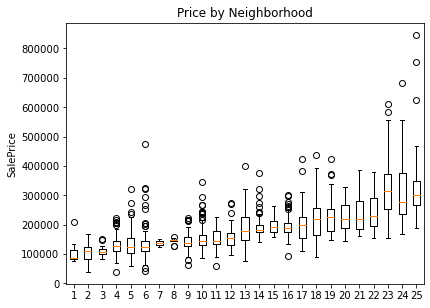

Neighborhood| Total
------------| -----
Blueste     | 2    
NPkVill     | 9    
Veenker     | 11   
BrDale      | 16   
Blmngtn     | 17   
MeadowV     | 17   
SWISU       | 25   
StoneBr     | 25   
ClearCr     | 28   
IDOTRR      | 37   
Timber      | 38   
NoRidge     | 41   
Mitchel     | 49   
Crawfor     | 51   
BrkSide     | 58   
SawyerW     | 59   
NWAmes      | 73   
Sawyer      | 74   
NridgHt     | 77   
Gilbert     | 79   
Somerst     | 86   
Edwards     | 98   
OldTown     | 113  
CollgCr     | 150  
NAmes       | 225  


In [35]:
//Neighborhood data 
`SalePrice xasc select avg SalePrice,PPSF: avg SalePrice%GrLivArea  by Neighborhood from t


plt.ylabel"SalePrice";
plt.xlabel"";
plt.title"Price by Neighborhood";
plt.boxplot[(exec SalePrice from t where Neighborhood=`MeadowV;exec SalePrice from t where Neighborhood=`IDOTRR;exec SalePrice from t where Neighborhood=`BrDale;exec SalePrice from t where Neighborhood=`BrkSide;exec SalePrice from t where Neighborhood=`Edwards;exec SalePrice from t where Neighborhood=`OldTown;exec SalePrice from t where Neighborhood=`Blueste;exec SalePrice from t where Neighborhood=`NPkVill;exec SalePrice from t where Neighborhood=`Sawyer;exec SalePrice from t where Neighborhood=`NAmes;exec SalePrice from t where Neighborhood=`SWISU;exec SalePrice from t where Neighborhood=`Mitchel;exec SalePrice from t where Neighborhood=`SawyerW;exec SalePrice from t where Neighborhood=`Gilbert;exec SalePrice from t where Neighborhood=`Blmngtn;exec SalePrice from t where Neighborhood=`NWAmes;exec SalePrice from t where Neighborhood=`CollgCr;exec SalePrice from t where Neighborhood=`Crawfor;exec SalePrice from t where Neighborhood=`Somerst;exec SalePrice from t where Neighborhood=`ClearCr;exec SalePrice from t where Neighborhood=`Veenker;exec SalePrice from t where Neighborhood=`Timber;exec SalePrice from t where Neighborhood=`NridgHt;exec SalePrice from t where Neighborhood=`StoneBr;exec SalePrice from t where Neighborhood=`NoRidge)]
plt.show[];

`Total xasc select Total:(count Id) by Neighborhood from t


In [36]:
//Cluster the groups where number  of observations is too low
//(Blueste,OldTown)(NPkVill,Sawyer)(Veenker,Timber)(BrDale,IDOTRR)(Blmngtn,CollgCr)
//(MeadowV,IDOTRR)(SWISU,NAmes)(StoneBr,NridgHt)(ClearCr,Somerst)
update Neighborhood:`OldTown from `t where Neighborhood=`Blueste
update Neighborhood:`Sawyer from `t where Neighborhood=`NPkVill;
update Neighborhood:`Timber from `t where Neighborhood=`Veenker;
update Neighborhood:`IDOTRR from `t where Neighborhood=`BrDale;
update Neighborhood:`CollgCr from `t where Neighborhood=`Blmngtn;
update Neighborhood:`IDOTRR from `t where Neighborhood=`MeadowV;
update Neighborhood:`NAmes from `t where Neighborhood=`SWISU;
update Neighborhood:`NridgHt from `t where Neighborhood=`StoneBr;
update Neighborhood:`Somerst from `t where Neighborhood=`ClearCr;



`t


Neighborhood| SalePrice PPSF    
------------| ------------------
IDOTRR      | 105077.7  96.45925
BrkSide     | 129375    110.2931
Edwards     | 133416.1  107.6236
OldTown     | 135166.3  96.00522
Sawyer      | 144301.3  122.5606
NAmes       | 151809.7  117.1944
Mitchel     | 160738.6  128.5918
SawyerW     | 189684.4  121.5333
Gilbert     | 194061.1  119.8521
NWAmes      | 194434.7  115.2522
CollgCr     | 198095.7  137.0892
Crawfor     | 218830.9  124.302 
Somerst     | 227007.2  139.9318
Timber      | 244788.5  145.0581
NridgHt     | 316925.4  165.5913
NoRidge     | 340626.8  133.9963


{[f;x]embedPy[f;x]}[foreign]enlist


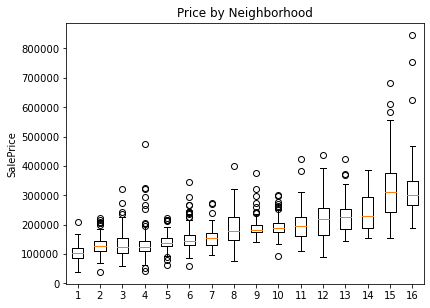

{[f;x]embedPy[f;x]}[foreign]enlist


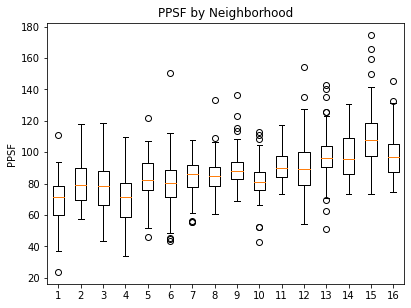

Neighborhood| Total
------------| -----
NoRidge     | 41   
Mitchel     | 49   
Timber      | 49   
Crawfor     | 51   
BrkSide     | 58   
SawyerW     | 59   
IDOTRR      | 70   
NWAmes      | 73   
Gilbert     | 79   
Sawyer      | 83   
Edwards     | 98   
NridgHt     | 102  
Somerst     | 114  
OldTown     | 115  
CollgCr     | 167  
NAmes       | 250  


In [37]:
`SalePrice xasc select avg SalePrice,PPSF: avg SalePrice%GrLivArea  by Neighborhood from t


plt.ylabel"SalePrice";
plt.xlabel"";
plt.title"Price by Neighborhood";
plt.boxplot[(exec SalePrice from t where Neighborhood=`IDOTRR;exec SalePrice from t where Neighborhood=`BrkSide;exec SalePrice from t where Neighborhood=`Edwards;exec SalePrice from t where Neighborhood=`OldTown;exec SalePrice from t where Neighborhood=`Sawyer;exec SalePrice from t where Neighborhood=`NAmes;exec SalePrice from t where Neighborhood=`Mitchel;exec SalePrice from t where Neighborhood=`SawyerW;exec SalePrice from t where Neighborhood=`Gilbert;exec SalePrice from t where Neighborhood=`NWAmes;exec SalePrice from t where Neighborhood=`CollgCr;exec SalePrice from t where Neighborhood=`Crawfor;exec SalePrice from t where Neighborhood=`Somerst;exec SalePrice from t where Neighborhood=`Timber;exec SalePrice from t where Neighborhood=`NridgHt;exec SalePrice from t where Neighborhood=`NoRidge)]
plt.show[];

plt.ylabel"PPSF";
plt.xlabel"";
plt.title"PPSF by Neighborhood";
plt.boxplot[(exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`IDOTRR;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`BrkSide;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Edwards;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`OldTown;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Sawyer;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`NAmes;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Mitchel;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`SawyerW;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Gilbert;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`NWAmes;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`CollgCr;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Crawfor;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Somerst;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`Timber;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`NridgHt;exec SalePrice%((.5 * TotalBsmtSF) + GrLivArea + (.2 * GarageArea)) from t where Neighborhood=`NoRidge)]
plt.show[];


`Total xasc select Total:(count Id) by Neighborhood from t

BsmtFinType1| SalePrice
------------| ---------
ALQ         | 167552.5 
BLQ         | 153749.4 
GLQ         | 237809.5 
LwQ         | 163269.9 
NA          | 111943.2 
Rec         | 154035.4 
Unf         | 174771.6 


{[f;x]embedPy[f;x]}[foreign]enlist


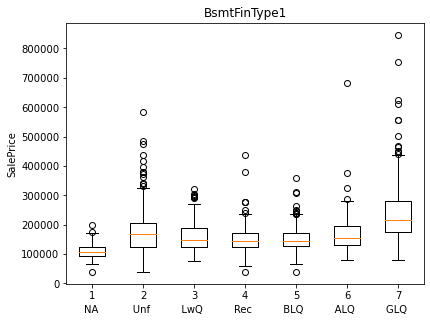

{[f;x]embedPy[f;x]}[foreign]enlist


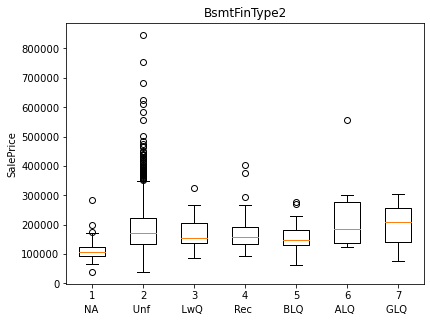

In [38]:
//explore Basement data
//BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath, 
//BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 
`BsmtFinType1 xasc select avg SalePrice by BsmtFinType1 from t

plt.ylabel"SalePrice";
plt.xlabel"NA           Unf          LwQ          Rec          BLQ          ALQ          GLQ";
plt.title"BsmtFinType1";
plt.boxplot[(exec SalePrice from t where BsmtFinType1=`NA;exec SalePrice from t where BsmtFinType1=`Unf;exec SalePrice from t where BsmtFinType1=`LwQ;exec SalePrice from t where BsmtFinType1=`Rec;exec SalePrice from t where BsmtFinType1=`BLQ;exec SalePrice from t where BsmtFinType1=`ALQ;exec SalePrice from t where BsmtFinType1=`GLQ)]
plt.show[];


plt.ylabel"SalePrice";
plt.xlabel"NA           Unf          LwQ          Rec          BLQ          ALQ          GLQ";
plt.title"BsmtFinType2";
plt.boxplot[(exec SalePrice from t where BsmtFinType2=`NA;exec SalePrice from t where BsmtFinType2=`Unf;exec SalePrice from t where BsmtFinType2=`LwQ;exec SalePrice from t where BsmtFinType2=`Rec;exec SalePrice from t where BsmtFinType2=`BLQ;exec SalePrice from t where BsmtFinType2=`ALQ;exec SalePrice from t where BsmtFinType2=`GLQ)]
plt.show[];
//Clearly BsmtFinType1,BsmtFinType2 is not properly distance ordinal data, we will hot encode later


{[f;x]embedPy[f;x]}[foreign]enlist


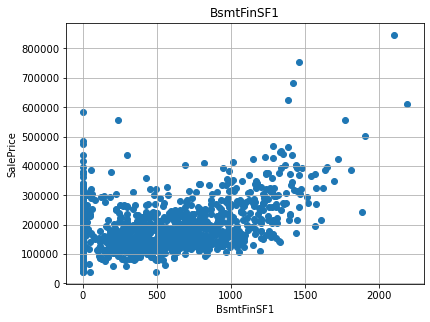

{[f;x]embedPy[f;x]}[foreign]enlist


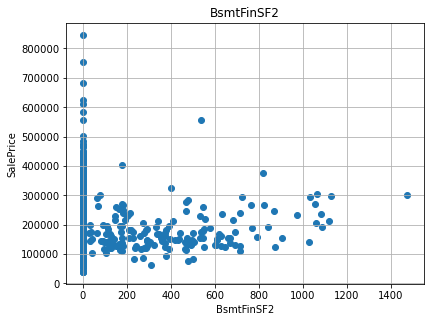

{[f;x]embedPy[f;x]}[foreign]enlist


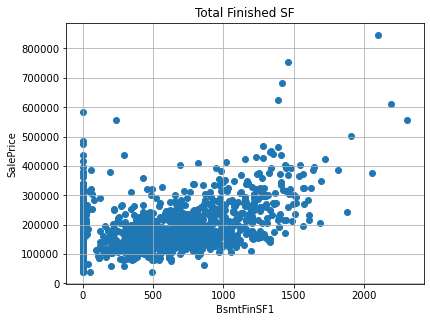

{[f;x]embedPy[f;x]}[foreign]enlist


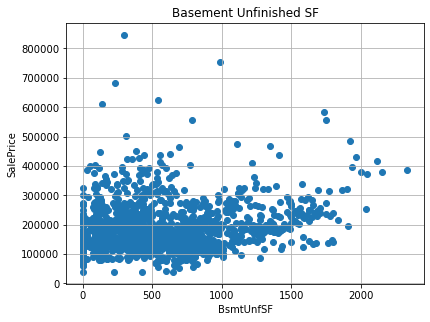

{[f;x]embedPy[f;x]}[foreign]enlist


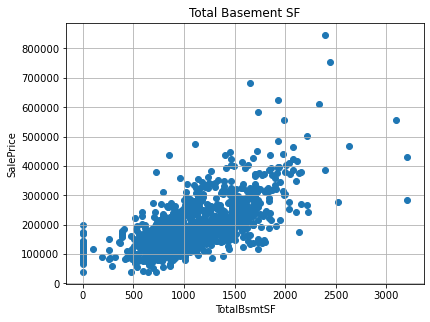

In [39]:
//examine BsmtFinSF1,BsmtFinSF2

plt.xlabel"BsmtFinSF1";
plt.ylabel"SalePrice";
plt.title"BsmtFinSF1";
plt.grid 1b;
plt.scatter[exec BsmtFinSF1 from t;exec SalePrice from t]
plt.show[];

plt.xlabel"BsmtFinSF2";
plt.ylabel"SalePrice";
plt.title"BsmtFinSF2";
plt.grid 1b;
plt.scatter[exec BsmtFinSF2 from t;exec SalePrice from t]
plt.show[];

plt.xlabel"BsmtFinSF1";
plt.ylabel"SalePrice";
plt.title"Total Finished SF";
plt.grid 1b;
plt.scatter[exec BsmtFinSF1+BsmtFinSF2 from t;exec SalePrice from t]
plt.show[];


plt.xlabel"BsmtUnfSF";
plt.ylabel"SalePrice";
plt.title"Basement Unfinished SF";
plt.grid 1b;
plt.scatter[exec BsmtUnfSF from t;exec SalePrice from t]
plt.show[];

plt.xlabel"TotalBsmtSF";
plt.ylabel"SalePrice";
plt.title"Total Basement SF";
plt.grid 1b;
plt.scatter[exec TotalBsmtSF from t;exec SalePrice from t]
plt.show[];

{[f;x]embedPy[f;x]}[foreign]enlist


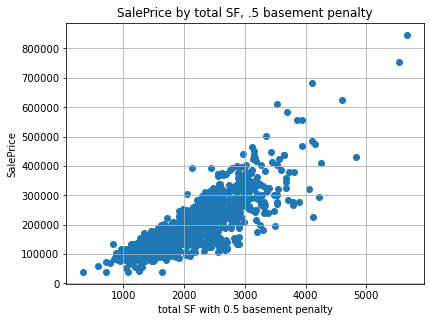

{[f;x]embedPy[f;x]}[foreign]enlist


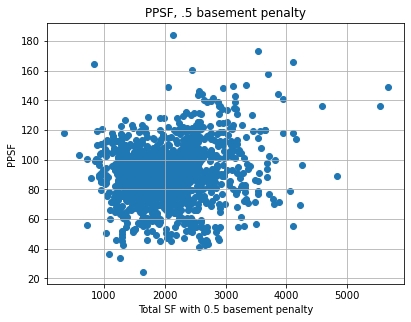

In [40]:
//Basement SF is kept out of GrLivArea, but still adds value

plt.xlabel"total SF with 0.5 basement penalty";
plt.ylabel"SalePrice";
plt.title"SalePrice by total SF, .5 basement penalty";
plt.grid 1b;
plt.scatter[(0.5 * exec TotalBsmtSF from t)+(exec GrLivArea from t);exec SalePrice from t]
plt.show[];

basementPenalty:0.5
plt.xlabel"Total SF with 0.5 basement penalty";
plt.ylabel"PPSF";
plt.title"PPSF, .5 basement penalty";
plt.grid 1b;

plt.scatter[(basementPenalty * exec TotalBsmtSF from t)+(exec GrLivArea from t);(exec SalePrice%((basementPenalty * TotalBsmtSF)+(GrLivArea)) from t)]
plt.show[];

In [41]:
//We are looking for a circle in the last scatterplot. After adjusting for quality, hyperparameters, should be close
//We can come back later. We have a similar problem for garage, 2nd story, porch, etc. 


In [42]:
//Investigate LandSlope:
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg SalePrice,  avg LotArea by LandSlope from t
select from t where LandSlope=`Sev
select LotArea,Neighborhood,(GrLivArea+TotalBsmtSF*0.5),SalePrice , SalePrice%(GrLivArea+TotalBsmtSF*0.5)from t where LandSlope=`Sev

//apparenty LandSlope is tied to LotArea, Neighborhood.

LandSlope| PPSF     SalePrice LotArea 
---------| ---------------------------
Gtl      | 89.88337 184048.8  9719.131
Mod      | 93.85153 208118.5  14799.42
Sev      | 98.20299 222499.6  67401.92


Id   MSSubClass MSZoning LotFrontage LotArea Alley LotShape LandContour LotConfig LandSlope Neigh..
-------------------------------------------------------------------------------------------------..
121  80         RL       63          21453   NA    IR1      Low         CulDSac   Sev       Somer..
250  50         RL       63          159000  NA    IR2      Low         CulDSac   Sev       Somer..
272  20         RL       73          39104   NA    IR1      Low         CulDSac   Sev       Somer..
314  20         RL       150         215245  NA    IR3      Low         Inside    Sev       Timbe..
336  190        RL       63          164660  NA    IR1      HLS         Corner    Sev       Timbe..
376  30         RL       63          10020   NA    IR1      Low         Inside    Sev       Edwar..
589  20         RL       65          25095   NA    IR1      Low         Inside    Sev       Somer..
629  60         RL       70          11606   NA    IR1      HLS         Inside    Sev       NAmes..


LotArea Neighborhood GrLivArea SalePrice SalePrice1
---------------------------------------------------
21453   Somerst      1457      180000    123.5415  
159000  Somerst      2866      276500    96.47592  
39104   Somerst      2055.5    305696.2  148.7211  
215245  Timber       3104      375000    120.8119  
164660  Timber       2535.5    228250    90.02169  
10020   Edwards      1245.5    84722.22  68.02266  
25095   Somerst      2191.5    143000    65.25211  
11606   NAmes        2600      155172.4  59.6817   
5400    OldTown      1609.5    123272.7  76.5907   
115149  Somerst      2645.5    302000    114.1561  
28698   Somerst      2632.5    266110.5  101.0866  
23595   Somerst      2190      260000    118.7215  
57200   Timber       2060.5    192771.1  93.55549  


In [43]:
//Look at Roof Material
`Total xasc select Total:(count Id) by RoofMatl from t
select PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg(GrLivArea+TotalBsmtSF*0.5),avg SalePrice by RoofMatl from t 
//there are definate benefits to Membran, Metal, possibly WdShingl, with a discount for Roll
//investigate houses similar to one with Membran:
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5),avg SalePrice from t where Neighborhood = `Somerst ,(GrLivArea+TotalBsmtSF*0.5) <2355,(GrLivArea+TotalBsmtSF*0.5) >1755 , RoofMatl =`CompShg


//Investigate Membrane Roof House
flip select from t where RoofMatl = `Membran
select avg LotArea from t
//Membran SQFT is explained by lot area, no premium, we cluster that with CompShg 
update RoofMatl:`CompShg from `t where RoofMatl=`Membran 

//investigate Metal Roof House
flip select from t where RoofMatl = `Metal
//twice the LotArea, in a nice Neighborhood
select PPSF: SalePrice%(GrLivArea+TotalBsmtSF*0.5),  (GrLivArea+TotalBsmtSF*0.5),  SalePrice , LotArea from t where OverallQual>4,OverallQual<8,(GrLivArea+TotalBsmtSF*0.5) <1757,(GrLivArea+TotalBsmtSF*0.5) >1157 , Neighborhood=`Somerst,RoofMatl =`CompShg

//Investigate Roll Roof House
//Discounts: RoofMatl=Roll :57/70
flip select from t where RoofMatl = `Roll
select PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg  (GrLivArea+TotalBsmtSF*0.5),avg   SalePrice , avg LotArea from t where OverallQual>3,OverallQual<7,(GrLivArea+TotalBsmtSF*0.5) <2684,(GrLivArea+TotalBsmtSF*0.5) >2084 , Neighborhood=`NAmes,RoofMatl =`CompShg


RoofMatl| Total
--------| -----
Membran | 1    
Metal   | 1    
Roll    | 1    
WdShake | 5    
WdShngl | 6    
Tar&Grv | 11   
CompShg | 1433 


RoofMatl| PPSF     GrLivArea SalePrice
--------| ----------------------------
CompShg | 89.96048 2026.814  184119.5 
Membran | 148.7211 2055.5    305696.2 
Metal   | 123.5415 1457      180000   
Roll    | 57.46644 2384      137000   
Tar&Grv | 95.74063 2235.318  213999.2 
WdShake | 89.88398 2825.3    249227.3 
WdShngl | 111.7279 3420.333  390250   


PPSF     GrLivArea SalePrice
----------------------------
102.0342 2043.204  208916.7 


Id            | 272     
MSSubClass    | 20      
MSZoning      | RL      
LotFrontage   | 73      
LotArea       | 39104   
Alley         | NA      
LotShape      | IR1     
LandContour   | Low     
LotConfig     | CulDSac 
LandSlope     | Sev     
Neighborhood  | Somerst 
Condition1    | Norm    
Condition2    | Norm    
BldgType      | 1Fam    
HouseStyle    | 1Story  
OverallQual   | 7       
OverallCond   | 7       
YearBuilt     | 1954    
YearRemodAdd  | 2005    
RoofStyle     | Flat    
RoofMatl      | Membran 
Exterior1st   | Plywood 
Exterior2nd   | Plywood 
MasVnrType    | None    
MasVnrArea    | 0       
ExterQual     | TA      
ExterCond     | TA      
Foundation    | CBlock  
BsmtQual      | Gd      
BsmtCond      | TA      
BsmtExposure  | Gd      
BsmtFinType1  | LwQ     
BsmtFinSF1    | 226     
BsmtFinType2  | GLQ     
BsmtFinSF2    | 1063    
BsmtUnfSF     | 96      
TotalBsmtSF   | 1385    
Heating       | GasA    
HeatingQC     | Ex      
CentralAir    | Y       


LotArea 
--------
10459.94


`t


Id            | 121    
MSSubClass    | 80     
MSZoning      | RL     
LotFrontage   | 63     
LotArea       | 21453  
Alley         | NA     
LotShape      | IR1    
LandContour   | Low    
LotConfig     | CulDSac
LandSlope     | Sev    
Neighborhood  | Somerst
Condition1    | Norm   
Condition2    | Norm   
BldgType      | 1Fam   
HouseStyle    | SLvl   
OverallQual   | 6      
OverallCond   | 5      
YearBuilt     | 1969   
YearRemodAdd  | 1969   
RoofStyle     | Flat   
RoofMatl      | Metal  
Exterior1st   | Plywood
Exterior2nd   | Plywood
MasVnrType    | None   
MasVnrArea    | 0      
ExterQual     | TA     
ExterCond     | TA     
Foundation    | CBlock 
BsmtQual      | TA     
BsmtCond      | TA     
BsmtExposure  | Gd     
BsmtFinType1  | ALQ    
BsmtFinSF1    | 938    
BsmtFinType2  | Unf    
BsmtFinSF2    | 0      
BsmtUnfSF     | 0      
TotalBsmtSF   | 938    
Heating       | GasA   
HeatingQC     | Ex     
CentralAir    | Y      
Electrical    | SBrkr  
1stFlrSF      | 

PPSF     GrLivArea SalePrice LotArea
------------------------------------
107.5163 1530      164500    3951   
105.408  1562.5    164700    4251   
95.54223 1736.5    165909.1  3604   
100.6667 1500      151000    3182   
108.0218 1377.5    148800    5105   
99.55042 1557      155000    8816   
96.78267 1523      147400    2544   
100.6667 1500      151000    3180   
113.551  1530      173733    3000   
96.01397 1718.5    165000    2651   
103.0928 1552      160000    2160   
110.016  1562.5    171900    4017   
109.2061 1500      163809.1  3180   


Id            | 1276   
MSSubClass    | 90     
MSZoning      | RL     
LotFrontage   | 95     
LotArea       | 11345  
Alley         | NA     
LotShape      | Reg    
LandContour   | Lvl    
LotConfig     | Corner 
LandSlope     | Gtl    
Neighborhood  | NAmes  
Condition1    | Feedr  
Condition2    | Norm   
BldgType      | Duplex 
HouseStyle    | 2Story 
OverallQual   | 5      
OverallCond   | 5      
YearBuilt     | 1948   
YearRemodAdd  | 1950   
RoofStyle     | Gable  
RoofMatl      | Roll   
Exterior1st   | AsbShng
Exterior2nd   | AsbShng
MasVnrType    | Stone  
MasVnrArea    | 567    
ExterQual     | TA     
ExterCond     | TA     
Foundation    | CBlock 
BsmtQual      | TA     
BsmtCond      | TA     
BsmtExposure  | No     
BsmtFinType1  | Rec    
BsmtFinSF1    | 220    
BsmtFinType2  | Unf    
BsmtFinSF2    | 0      
BsmtUnfSF     | 708    
TotalBsmtSF   | 928    
Heating       | GasA   
HeatingQC     | Gd     
CentralAir    | Y      
Electrical    | FuseA  
1stFlrSF      | 

PPSF     GrLivArea SalePrice LotArea 
-------------------------------------
70.84756 2308.89   162785    10315.16


In [44]:
//premiums:RoofMatl=Metal : 123/104 = 1.18
//Discounts: RoofMatl=Roll :57/70=0.81
//We scale everything to same roof material and delete the column
select SalePrice from t where RoofMatl=`Metal
t:update SalePrice:SalePrice%1.18 from t where RoofMatl=`Metal
select SalePrice from t where RoofMatl=`Metal

select SalePrice from t where RoofMatl=`Roll
t:update SalePrice:SalePrice%0.81 from t where RoofMatl=`Roll
select SalePrice from t where RoofMatl=`Roll

t:delete RoofMatl from t
count cols t


SalePrice
---------
180000   


SalePrice
---------
152542.4 


SalePrice
---------
137000   


SalePrice
---------
169135.8 


68


{[f;x]embedPy[f;x]}[foreign]enlist


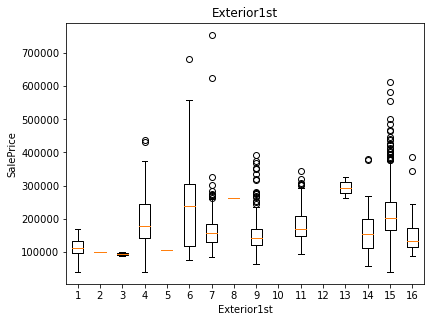

Exterior1st| PPSF     GrLivArea SalePrice
-----------| ----------------------------
AsbShng    | 69.17462 1703.275  113908.4 
AsphShn    | 60.09615 1664      100000   
BrkComm    | 74.87396 1429      92550.64 
BrkFace    | 91.37374 2214.67   203080.1 
CBlock     | 58.52843 1794      105000   
CemntBd    | 99.54904 2272.85   236957.5 
HdBoard    | 88.07562 1898.782  166776.7 
ImStucc    | 107.5534 2436      262000   
MetalSd    | 85.1608  1818.505  154057.6 
Plywood    | 86.45676 2135.579  182757.9 
Stone      | 99.97449 3014      293750   
Stucco     | 81.18052 2052.813  169346.7 
VinylSd    | 97.70251 2192.795  216417.3 
Wd Sdng    | 80.88078 1931.646  156665.1 
WdShing    | 90.67747 1726.519  156762.9 


{[f;x]embedPy[f;x]}[foreign]enlist


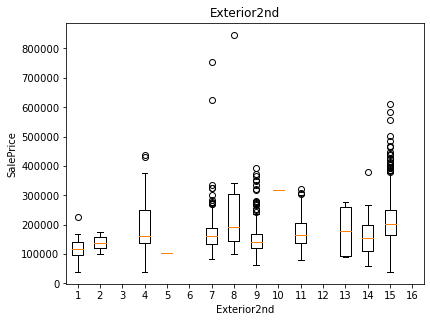

Exterior2nd| PPSF     GrLivArea SalePrice
-----------| ----------------------------
AsbShng    | 68.5486  1795.35   119427   
AsphShn    | 83.66806 1684.333  138000   
Brk Cmn    | 78.44178 1741.857  132871.6 
BrkFace    | 90.13661 2211.4    200718   
CBlock     | 58.52843 1794      105000   
CmentBd    | 98.77407 2258.559  232242   
HdBoard    | 88.42803 1949.814  172451.6 
ImStucc    | 100.5144 2470.7    269243.7 
MetalSd    | 85.21499 1816.914  154164.6 
Other      | 116.7216 2733      319000   
Plywood    | 86.59112 2051.377  175294   
Stone      | 88.32556 2064.2    180101.6 
Stucco     | 79.73741 2080.78   165785.5 
VinylSd    | 97.82993 2194.643  216853.9 
Wd Sdng    | 81.45519 1904.124  154585   
Wd Shng    | 88.25133 1877.684  170255.7 


In [45]:
//Explore Exterior1st and Exterior2nd

plt.ylabel"SalePrice";
plt.xlabel"Exterior1st";
plt.title"Exterior1st";
plt.boxplot[(exec SalePrice from t where Exterior1st=`AsbShng;exec SalePrice from t where Exterior1st=`AsphShn;exec SalePrice from t where Exterior1st=`BrkComm;exec SalePrice from t where Exterior1st=`BrkFace;exec SalePrice from t where Exterior1st=`CBlock;exec SalePrice from t where Exterior1st=`CemntBd;exec SalePrice from t where Exterior1st=`HdBoard;exec SalePrice from t where Exterior1st=`ImStucc;exec SalePrice from t where Exterior1st=`MetalSd;exec SalePrice from t where Exterior1st=`Other;exec SalePrice from t where Exterior1st=`Plywood;exec SalePrice from t where Exterior1st=`PreCast;exec SalePrice from t where Exterior1st=`Stone;exec SalePrice from t where Exterior1st=`Stucco;exec SalePrice from t where Exterior1st=`VinylSd;exec SalePrice from t where Exterior1st=`WdShing)]
plt.show[];

select PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg (GrLivArea+TotalBsmtSF*0.5),avg SalePrice by Exterior1st from t 

plt.ylabel"SalePrice";
plt.xlabel"Exterior2nd";
plt.title"Exterior2nd";
plt.boxplot[(exec SalePrice from t where Exterior2nd=`AsbShng;exec SalePrice from t where Exterior2nd=`AsphShn;exec SalePrice from t where Exterior2nd=`BrkComm;exec SalePrice from t where Exterior2nd=`BrkFace;exec SalePrice from t where Exterior2nd=`CBlock;exec SalePrice from t where Exterior2nd=`CemntBd;exec SalePrice from t where Exterior2nd=`HdBoard;exec SalePrice from t where Exterior2nd=`ImStucc;exec SalePrice from t where Exterior2nd=`MetalSd;exec SalePrice from t where Exterior2nd=`Other;exec SalePrice from t where Exterior2nd=`Plywood;exec SalePrice from t where Exterior2nd=`PreCast;exec SalePrice from t where Exterior2nd=`Stone;exec SalePrice from t where Exterior2nd=`Stucco;exec SalePrice from t where Exterior2nd=`VinylSd;exec SalePrice from t where Exterior2nd=`WdShing)]
plt.show[];

select PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5),avg (GrLivArea+TotalBsmtSF*0.5),avg SalePrice by Exterior2nd from t 

In [46]:
//Intuitively, there is a premium on having 2 different coverings on the exterior
//Notice, the name "WdShing" on External1st does not match "Wd Shng" on Exterior2nd
//however, which second covering does not likely matter. We can replace Exterior2nd with a binary variable
count select Exterior2nd from t where Exterior2nd<>Exterior1st //214
count raze(value -1#select Id by Exterior2nd from t)[`Id] 
//38 "Wd Shng" on Exterior2nd
select Id, Exterior2nd from t where Exterior1st = `WdShing
/duplicates are Id 12, 54, 128, 174,  176, 394, 414, 444, 563, 572, 750, 803, 873, 1029, 1113, 1385, 1400, 1401
update Exterior2:1 from `t where Exterior2nd<>Exterior1st
update Exterior2:0 from `t where Exterior2nd=Exterior1st

{[x]update Exterior2:0 from `t where Id=x} each (12 54 128 174  176 394 414 444 563 572 750 803 873 1029 1113 1385 1400 1401)
10#select Id, Exterior1st, Exterior2nd from t where Exterior2=1
//More duplicates from mispellings:Id 24 76 109 190 197 262 279 305 306 317 345 350 358 378 400 411 422 435 475 490 491 516 523 592 615 619 645 650 651 674 725 731 794 818 826 876 916 974 981 984 995 1001 1008 1039 1040 1047 1061 1069 1087 1182 1218 1220 1289 1292 1368 1375 1406 1450 1452 1458
{[x]update Exterior2:0 from `t where Id=x} each 24 76 109 190 197 262 279 305 306 317 345 350 358 378 400 411 422 435 475 490 491 516 523 592 615 619 645 650 651 674 725 731 794 818 826 876 916 974 981 984 995 1001 1008 1039 1040 1047 1061 1069 1087 1182 1218 1220 1289 1292 1368 1375 1406 1450 1452 1458
delete Exterior2nd from `t
update Exterior2nd:Exterior2 from `t
delete Exterior2 from `t
count select Exterior2nd from t where Exterior2nd=0
count select Exterior2nd from t where Exterior2nd=1

214


38


Id   Exterior2nd
----------------
12   Wd Shng    
54   Wd Shng    
128  Wd Sdng    
174  Wd Shng    
176  Wd Shng    
372  Plywood    
394  Wd Shng    
414  Wd Shng    
439  Stucco     
444  Wd Shng    
472  Plywood    
563  Wd Shng    
572  Wd Shng    
644  HdBoard    
750  Wd Shng    
803  Wd Shng    
873  Wd Shng    
953  HdBoard    
955  Plywood    
1029 Wd Shng    
1113 Wd Shng    
1131 Plywood    
1295 Plywood    
1385 Wd Shng    
1400 Wd Shng    
1401 Wd Shng    


`t


`t


`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t


Id Exterior1st Exterior2nd
--------------------------
4  Wd Sdng     Wd Shng    
9  BrkFace     Wd Shng    
13 HdBoard     Plywood    
20 BrkFace     Plywood    
24 CemntBd     CmentBd    
40 AsbShng     Plywood    
45 BrkFace     Wd Sdng    
56 HdBoard     Plywood    
70 BrkFace     AsbShng    
72 HdBoard     Plywood    


`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`t`..


`t


`t


`t


1322


136


{[f;x]embedPy[f;x]}[foreign]enlist


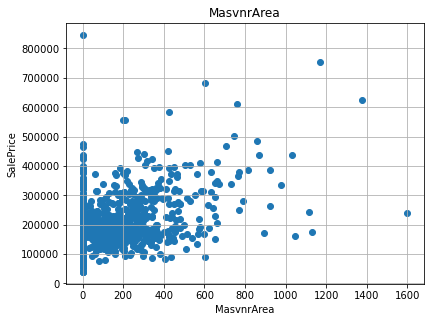

In [47]:
//Explore MasVnrArea
plt.xlabel"MasvnrArea";
plt.ylabel"SalePrice";
plt.title"MasvnrArea";
plt.grid 1b;
plt.scatter[exec MasVnrArea from t;exec SalePrice from t]
plt.show[];

{[f;x]embedPy[f;x]}[foreign]enlist


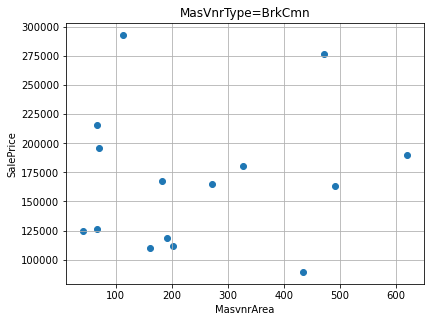

{[f;x]embedPy[f;x]}[foreign]enlist


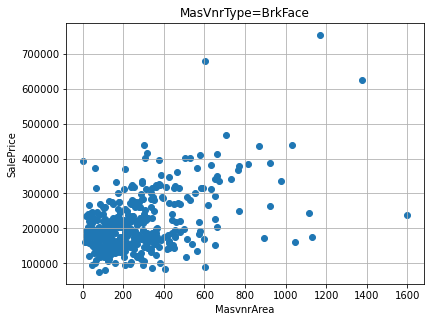

{[f;x]embedPy[f;x]}[foreign]enlist


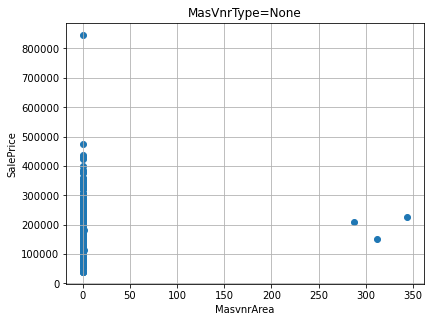

{[f;x]embedPy[f;x]}[foreign]enlist


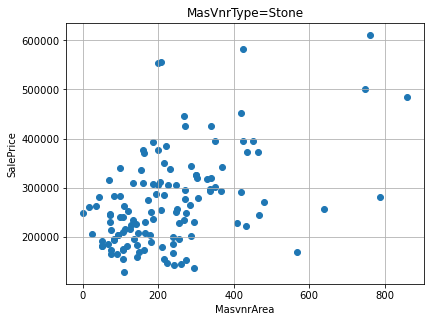

In [48]:
//size is a lurking variable, with MasVnrType as the quality factor.
//Explore MasVnrType
plt.xlabel"MasvnrArea";
plt.ylabel"SalePrice";
plt.title"MasVnrType=BrkCmn";
plt.grid 1b;
plt.scatter[exec MasVnrArea from t where MasVnrType=`BrkCmn;exec SalePrice from t where MasVnrType=`BrkCmn]
plt.show[];

plt.xlabel"MasvnrArea";
plt.ylabel"SalePrice";
plt.title"MasVnrType=BrkFace";
plt.grid 1b;
plt.scatter[exec MasVnrArea from t where MasVnrType=`BrkFace;exec SalePrice from t where MasVnrType=`BrkFace]
plt.show[];

plt.xlabel"MasvnrArea";
plt.ylabel"SalePrice";
plt.title"MasVnrType=None";
plt.grid 1b;
plt.scatter[exec MasVnrArea from t where MasVnrType=`None;exec SalePrice from t where MasVnrType=`None]
plt.show[];

plt.xlabel"MasvnrArea";
plt.ylabel"SalePrice";
plt.title"MasVnrType=Stone";
plt.grid 1b;
plt.scatter[exec MasVnrArea from t where MasVnrType=`Stone;exec SalePrice from t where MasVnrType=`Stone]
plt.show[];


{[f;x]embedPy[f;x]}[foreign]enlist


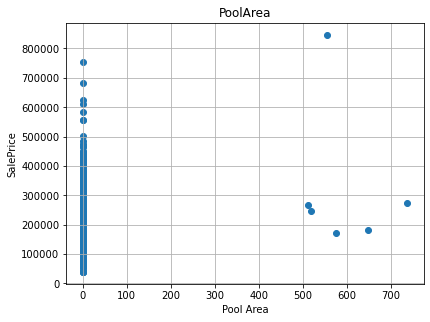

{[f;x]embedPy[f;x]}[foreign]enlist


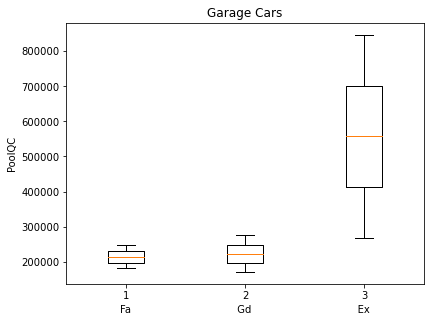

PoolQC| total
------| -----
Ex    | 2    
Fa    | 2    
Gd    | 2    
NA    | 1452 


In [49]:
//Investigate PoolArea, PoolQC
plt.xlabel"Pool Area";
plt.ylabel"SalePrice";
plt.title"PoolArea";
plt.grid 1b;
plt.scatter[exec PoolArea from t;exec SalePrice from t ]
plt.show[];

plt.xlabel"Fa                                  Gd                                  Ex";
plt.ylabel"PoolQC";
plt.title"Garage Cars";
plt.boxplot[(exec SalePrice from t where PoolQC=`Fa;exec SalePrice from t where PoolQC=`Gd;exec SalePrice from t where PoolQC=`Ex)]
plt.show[];
//how manyof each PoolQC
select total:count Id  by PoolQC from t

In [50]:
//No correlation between Pool Area and SalePrice, we create a binary variable
//Not enough data for PoolQC to matter, we remove
update PoolArea:1.0 from `t where PoolArea<>0
delete PoolQC from `t

`t


`t


In [51]:
//Explore Condition1, Condition2
select avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5) from t
select total:count Id  by Condition1 from t
select avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5)  by Condition1 from t

select total:count Id  by Condition2 from t
select avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5)  by Condition2 from t
//normalize acccording to Condition1, 2


SalePrice PPSF     GrLivArea
----------------------------
185467.9  90.13077 2036.734 


Condition1| total
----------| -----
Artery    | 48   
Feedr     | 80   
Norm      | 1260 
PosA      | 8    
PosN      | 18   
RRAe      | 11   
RRAn      | 26   
RRNe      | 2    
RRNn      | 5    


Condition1| SalePrice PPSF     GrLivArea
----------| ----------------------------
Artery    | 139007.7  71.26255 1942.573 
Feedr     | 145772.6  77.95352 1914.594 
Norm      | 189100.8  91.73724 2037.047 
PosA      | 236796.7  88.93486 2677.375 
PosN      | 216855.6  85.56162 2537.306 
RRAe      | 149325.9  82.44116 1844.727 
RRAn      | 189507.1  90.49611 2073.962 
RRNe      | 190750    87.35575 2184     
RRNn      | 212400    95.76147 2159     


Condition2| total
----------| -----
Artery    | 2    
Feedr     | 6    
Norm      | 1444 
PosA      | 1    
PosN      | 1    
RRAe      | 1    
RRAn      | 1    
RRNn      | 2    


Condition2| SalePrice PPSF     GrLivArea
----------| ----------------------------
Artery    | 112977.3  62.18956 1880.25  
Feedr     | 122998.5  68.2499  1815.167 
Norm      | 185752.2  90.27668 2036.394 
PosA      | 325000    95.77133 3393.5   
PosN      | 385000    123.2789 3123     
RRAe      | 181700    55.05226 3300.5   
RRAn      | 136905    54.32738 2520     
RRNn      | 96750     94.41531 1008.75  


In [52]:
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where Condition1=`Artery 
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg (GrLivArea+TotalBsmtSF*0.5), avg OverallQual from t where YearBuilt <1950 
//Artery condition coincides with old housing, low quality. We give 0.95 multiplier
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where Condition1=`Feedr 
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg OverallQual, avg YearBuilt from t where YearBuilt < 1960, YearBuilt > 1940
//Similar as Artery, give 0.95 multiplier
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where Condition1=`PosA 
flip select from t where  Condition1 = `PosA
//  7/8 these houses are in NAmes Neighborhood
select PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where Condition1=`Norm, Neighborhood=`NAmes, OverallQual>5, YearBuilt>1960
count select from t where Condition1=`Norm, Neighborhood=`NAmes, OverallQual>5, YearBuilt>1960
//By comparing applies to apples, there seems to be no premium on PosA. Multiplier = 1
select avg GrLivArea ,avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where  GrLivArea>1500,YearBuilt >1955, Condition1=`PosN 
select avg GrLivArea,avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg YearBuilt,  avg OverallQual, avg OverallCond from t where  GrLivArea>1500,YearBuilt >1955, Condition1=`Norm 
count select from t where GrLivArea>1500,YearBuilt >1955, Condition1=`PosN 
count select from t where GrLivArea>1500,YearBuilt >1955, Condition1=`Norm
//Counterintuitively, there seems to be a discount, although the sample size is 12 and too small to draw conclusions. 
//Multiplier will be 1.0

PPSF     YearBuilt OverallQual OverallCond
------------------------------------------
71.26255 1933.083  5.583333    6.0625     


PPSF     GrLivArea OverallQual
------------------------------
76.41545 1835.264  5.283019   


PPSF     YearBuilt OverallQual OverallCond
------------------------------------------
77.95352 1953.6    5.25        5.75       


PPSF     OverallQual YearBuilt
------------------------------
84.91273 5.035088    1952.693 


PPSF     YearBuilt OverallQual OverallCond
------------------------------------------
88.93486 1968.375  6.625       6.5        


Id            | 67       294     447      472     860     935     998     1311   
MSSubClass    | 20       60      20       60      60      20      20      20     
MSZoning      | RL       RL      RL       RL      RL      RL      RL      RL     
LotFrontage   | 63       63      137      92      63      313     63      100    
LotArea       | 19900    16659   16492    11952   11029   27650   11717   17500  
Alley         | NA       NA      NA       NA      NA      NA      NA      NA     
LotShape      | Reg      IR1     IR1      Reg     IR1     IR2     IR1     Reg    
LandContour   | Lvl      Lvl     Lvl      Lvl     Lvl     HLS     Lvl     Lvl    
LotConfig     | Inside   Corner  Corner   Inside  Corner  Inside  Inside  Inside 
LandSlope     | Gtl      Gtl     Gtl      Gtl     Gtl     Mod     Gtl     Gtl    
Neighborhood  | NAmes    NWAmes  NAmes    NWAmes  NWAmes  NAmes   NWAmes  Crawfor
Condition1    | PosA     PosA    PosA     PosA    PosA    PosA    PosA    PosA   
Condition2    | 

PPSF     YearBuilt OverallQual OverallCond
------------------------------------------
88.34509 1967.55   6.325       6.15       


40


GrLivArea SalePrice PPSF     YearBuilt OverallQual OverallCond
--------------------------------------------------------------
2141.167  237470.8  85.12974 1978.583  6.916667    5.666667   


GrLivArea SalePrice PPSF     YearBuilt OverallQual OverallCond
--------------------------------------------------------------
1927.176  256035.4  98.13212 1994.043  7.208155    5.2103     


12


466


In [53]:
//Condition1
DictCondition1:(`Artery`Feedr`Norm`RRNn`RRAn`PosN`PosA`RRNe`RRAe)!(0.95,0.95,1,1,1,1,1,1,1)
update ScaleCondition1:DictCondition1(exec Condition1 from t) from `t
10#select SalePrice,ScaleCondition1 from t where ScaleCondition1<>1.0
update SalePrice:SalePrice%ScaleCondition1 from `t
10#select SalePrice from t where ScaleCondition1<>1
delete ScaleCondition1 from `t
delete Condition1 from `t

//Condition2
DictCondition2:(`Artery`Feedr`Norm`RRNn`RRAn`PosN`PosA`RRNe`RRAe)!(0.95,0.95,1,1,1,1,1,1,1)
update ScaleCondition2:DictCondition2(exec Condition2 from t) from `t
10#select SalePrice,ScaleCondition2 from t where ScaleCondition2<>1.0
update SalePrice:SalePrice%ScaleCondition2 from `t
10#select SalePrice from t where ScaleCondition2<>1
delete ScaleCondition2 from `t
delete Condition2 from `t

`t


SalePrice ScaleCondition1
-------------------------
181500    0.95           
177847.8  0.95           
118000    0.95           
68500     0.95           
40000     0.95           
80000     0.95           
96590.91  0.95           
115000    0.95           
87000     0.95           
166000    0.95           


`t


SalePrice
---------
191052.6 
187208.2 
124210.5 
72105.26 
42105.26 
84210.53 
101674.6 
121052.6 
91578.95 
174736.8 


`t


`t


`t


SalePrice ScaleCondition2
-------------------------
124210.5  0.95           
140000    0.95           
101674.6  0.95           
127000    0.95           
128000    0.95           
78900     0.95           
167500    0.95           
113636.4  0.95           
124210.5  0.95           
140000    0.95           


`t


SalePrice
---------
130747.9 
147368.4 
107025.9 
133684.2 
134736.8 
83052.63 
176315.8 
119617.2 
130747.9 
147368.4 


`t


`t


{[f;x]embedPy[f;x]}[foreign]enlist


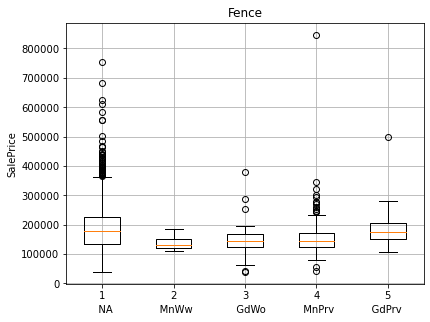

Fence| total
-----| -----
GdPrv| 59   
GdWo | 54   
MnPrv| 157  
MnWw | 11   
NA   | 1177 


In [54]:
//explore Fence
plt.xlabel"   NA               MnWw              GdWo            MnPrv            GdPrv";
plt.ylabel"SalePrice";
plt.title"Fence";
plt.grid 1b;
plt.boxplot[(exec SalePrice from t where Fence=`NA;exec SalePrice from t where Fence=`MnWw;exec SalePrice from t where Fence=`GdWo;exec SalePrice from t where Fence=`MnPrv;exec SalePrice from t where Fence=`GdPrv)]
plt.show[];
select total:count Id  by Fence from t

//keep as ordinal

In [55]:
//Put CentralAir into binary
//need a function
.gmb.preprocessing.binaryScale:{[table;binaryList]
    //table -- table with only orindinal columns
    //binaryList -- binary list (any data type) of the binary features in desired order from 0 to 1
    //returns table with binary columns changed to 0 and 1
    uniqueList:distinct binaryList; //sanity check
    binaryDictionary:uniqueList!(0 1);
    :{@[x;y;:;z[x[y]]]}[table;;binaryDictionary]cols table;
 };
update CentralAir:(raze value flip .gmb.preprocessing.binaryScale[select CentralAir from t;`N`Y]) from `t



`t


In [56]:
//Explore Heating

select total:count Id,PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg OverallCond, avg GrLivArea by Heating from t
//let's cluster into GasA and not GasA. There appears to be a premium on GasA, discount on everything else.
update HeatingType:1.0 from `t where Heating = `GasA
update HeatingType:0.0 from `t where Heating <> `GasA
delete Heating from `t
update Heating:HeatingType from `t
delete HeatingType from `t


Heating| total PPSF     OverallCond GrLivArea
-------| ------------------------------------
Floor  | 1     105.9942 6           720      
GasA   | 1426  90.84707 5.586957    1510.081 
GasW   | 18    77.03744 5.444444    1826.5   
Grav   | 7     66.74398 4.714286    888.8571 
OthW   | 2     49.28812 5           2208     
Wall   | 4     85.28297 4           1162.25  


`t


`t


`t


`t


`t


{[f;x]embedPy[f;x]}[foreign]enlist


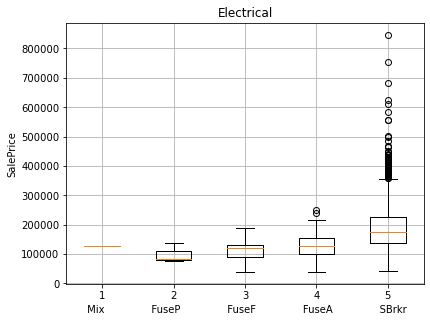

Electrical| total YearBuilt SalePrice PPSF     OverallCond GrLivArea
----------| --------------------------------------------------------
FuseP     | 3     1930      98614.04  65.65917 6           1281.333 
FuseF     | 27    1936.259  114111.8  76.20571 4.814815    1250.074 
FuseA     | 94    1937.904  130345.5  76.61511 5.457447    1305.574 
Mix       | 1     1920      126893.9  81.47283 2           1077     
SBrkr     | 1332  1974.383  191820.7  91.81987 5.602102    1531.132 
NA        | 1     2006      167500    105.6116 5           1394     


PPSF   
-------
110.954


`t


`t


`t


In [57]:
//Explore Electrical
plt.xlabel" Mix               FuseP               FuseF               FuseA               SBrkr";
plt.ylabel"SalePrice";
plt.title"Electrical";
plt.grid 1b;
plt.boxplot[(exec SalePrice from t where Electrical=`Mix;exec SalePrice from t where Electrical=`FuseP;exec SalePrice from t where Electrical=`FuseF;exec SalePrice from t where Electrical=`FuseA;exec SalePrice from t where Electrical=`SBrkr)]
plt.show[];
`PPSF xasc select total:count Id, avg YearBuilt, avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg OverallCond, avg GrLivArea by Electrical from t
select PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5) from t where YearBuilt>2005
//The `NA house is a new house, no premium or discount
//`Mix is an old house, no premium or discount
//We cluster FuseP into FuseF and Mix,NA,FuseA together, make it ordinal
update Electrical:`FuseF from `t where Electrical = `FuseP
update Electrical:`FuseA from `t where Electrical = `NA
update Electrical:`FuseA from `t where Electrical = `Mix

{[f;x]embedPy[f;x]}[foreign]enlist


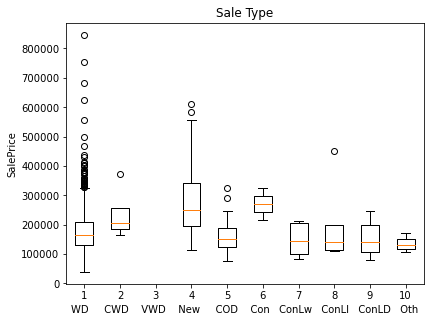

SaleType| total YearBuilt SalePrice PPSF     OverallCond GrLivArea
--------| --------------------------------------------------------
COD     | 43    1959.93   158127.3  80.58036 5.395349    1440.302 
ConLD   | 9     1954.667  149008.3  81.59656 4.666667    1404.556 
Oth     | 3     1979.333  136193.2  84.46457 4.333333    1092.667 
ConLI   | 5     1972.8    203639.1  85.9691  5.6         1670.2   
ConLw   | 5     1959.2    149366.7  87.34059 5.2         1315.2   
WD      | 1267  1968.458  178696.2  88.94814 5.646409    1490.635 
CWD     | 4     1954.75   237040.2  100.8068 6.25        1819.25  
New     | 120   2005.933  276826.7  110.7522 5           1752.517 
Con     | 2     2001      269600    118.7233 5           1633     


`t


`t


`t


`t


`t


In [58]:
//Explore SaleType
plt.xlabel"WD     CWD    VWD    New     COD    Con   ConLw   ConLI   ConLD   Oth";
plt.ylabel"SalePrice";
plt.title"Sale Type";
plt.boxplot[(exec SalePrice from t where SaleType=`WD;exec SalePrice from t where SaleType=`CWD;exec SalePrice from t where SaleType=`VWD;exec SalePrice from t where SaleType=`New;exec SalePrice from t where SaleType=`COD;exec SalePrice from t where SaleType=`Con;exec SalePrice from t where SaleType=`ConLw;exec SalePrice from t where SaleType=`ConLI;exec SalePrice from t where SaleType=`ConLD;exec SalePrice from t where SaleType=`Oth)]
plt.show[];
`PPSF xasc select total:count Id, avg YearBuilt, avg SalePrice, PPSF:avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg OverallCond, avg GrLivArea by SaleType from t
//There is a premium on New
//Some have low observations. We cluster some together (WD, CWD, Con) (ConLW,ConLI,ConLD,Oth)
update SaleType:`WD from `t where SaleType = `CWD
update SaleType:`WD from `t where SaleType = `Con
update SaleType:`ConLw from `t where SaleType = `ConLI
update SaleType:`ConLw from `t where SaleType = `ConLD
update SaleType:`ConLw from `t where SaleType = `Oth



{[f;x]embedPy[f;x]}[foreign]enlist


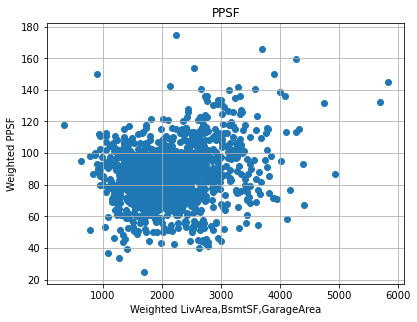

Id            | 810     1063    
MSSubClass    | 75      190     
MSZoning      | RM      RM      
LotFrontage   | 90      85      
LotArea       | 8100    13600   
Alley         | NA      Grvl    
LotShape      | Reg     Reg     
LandContour   | Lvl     Lvl     
LotConfig     | Corner  Inside  
LandSlope     | Gtl     Gtl     
Neighborhood  | OldTown OldTown 
BldgType      | 1Fam    2fmCon  
HouseStyle    | 2Story  2Story  
OverallQual   | 5       5       
OverallCond   | 5       5       
YearBuilt     | 1898    1900    
YearRemodAdd  | 1965    1950    
RoofStyle     | Hip     Gable   
Exterior1st   | AsbShng Wd Sdng 
MasVnrType    | None    None    
MasVnrArea    | 0       0       
ExterQual     | TA      TA      
ExterCond     | TA      TA      
Foundation    | PConc   BrkTil  
BsmtQual      | TA      TA      
BsmtCond      | TA      TA      
BsmtExposure  | No      No      
BsmtFinType1  | Unf     Unf     
BsmtFinSF1    | 0       0       
BsmtFinType2  | Unf     Unf     
BsmtFinSF2

`t


`t


In [59]:
plt.xlabel"Weighted LivArea,BsmtSF,GarageArea";
plt.ylabel"Weighted PPSF";
plt.title"PPSF";
plt.grid 1b;

plt.scatter[exec (GrLivArea+(TotalBsmtSF*0.5)+(GarageArea*0.2)) from t; exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t]
plt.show[];
//delete outliers
flip select from t where (SalePrice%(GrLivArea+(TotalBsmtSF*0.5)+(GarageArea*0.2)))<41,(SalePrice%(GrLivArea+(TotalBsmtSF*0.5)+(GarageArea*0.2)))>40
delete from `t where (SalePrice%(GrLivArea+(TotalBsmtSF*0.5)+(GarageArea*0.2)))<40
delete from `t where (SalePrice%(GrLivArea+(TotalBsmtSF*0.5)+(GarageArea*0.2)))>150

{[f;x]embedPy[f;x]}[foreign]enlist


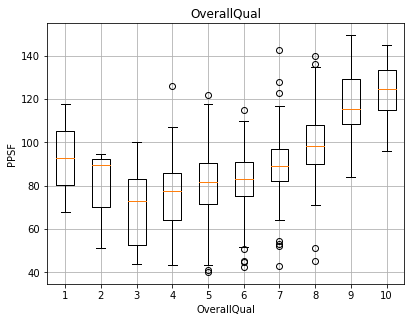

In [60]:
//check PPSF  by OverallQual
plt.xlabel"OverallQual";
plt.ylabel"PPSF";
plt.title"OverallQual";
plt.grid 1b;
plt.boxplot[(exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=1;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=2;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=3;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=4;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=5;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=6;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=7;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=8;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=9;exec SalePrice%((GarageArea*0.2)+GrLivArea+TotalBsmtSF*0.5) from t where OverallQual=10)]
plt.show[];



In [61]:
//low number of observations, bucket it
update OverallQual:3f from `t where  OverallQual=1
update OverallQual:3f from `t where  OverallQual=2

`t


`t


In [62]:
/explore houses with no Garage
select avg SalePrice, avg OverallQual, PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where GarageArea = 0
select avg SalePrice, avg OverallQual,  PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where GarageArea > 0,OverallQual<6
select avg SalePrice, avg OverallQual,  PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5), avg GrLivArea from t where GarageArea > 0
select Percentage:(count Id)%81 by Neighborhood from t where GarageArea = 0
select Percentage:(count Id)%1458 ,PPSF: avg SalePrice%(GrLivArea+TotalBsmtSF*0.5) by Neighborhood from t 

SalePrice OverallQual PPSF     GrLivArea
----------------------------------------
111597.3  4.696203    74.34799 1196.861 


SalePrice OverallQual PPSF     GrLivArea
----------------------------------------
136876    4.741453    84.02237 1222.276 


SalePrice OverallQual PPSF     GrLivArea
----------------------------------------
189940.6  6.180292    91.30442 1528.553 


Neighborhood| Percentage
------------| ----------
BrkSide     | 0.1234568 
CollgCr     | 0.02469136
Edwards     | 0.2716049 
IDOTRR      | 0.1604938 
Mitchel     | 0.0617284 
NAmes       | 0.1358025 
OldTown     | 0.1358025 
Sawyer      | 0.03703704
SawyerW     | 0.01234568
Somerst     | 0.01234568


Neighborhood| Percentage PPSF    
------------| -------------------
BrkSide     | 0.03978052 84.04977
CollgCr     | 0.1145405  96.53563
Crawfor     | 0.03429355 93.71091
Edwards     | 0.06721536 80.89157
Gilbert     | 0.05418381 94.01122
IDOTRR      | 0.04595336 74.29037
Mitchel     | 0.03360768 89.01547
NAmes       | 0.1707819  84.46928
NWAmes      | 0.05006859 85.63868
NoRidge     | 0.02812071 102.8832
NridgHt     | 0.06790123 113.7895
OldTown     | 0.0781893  74.77699
Sawyer      | 0.0569273  87.18498
SawyerW     | 0.04046639 90.11451
Somerst     | 0.0781893  102.6186
Timber      | 0.03360768 102.8805


In [63]:
//OverallQual and OverallCond are already scaled numerically. The rest must be rescaled as well. We need a function 
.gmb.preprocessing.ordinalScale:{[table;ordinalList]
    //table -- table with only orindinal columns
    //ordinalList -- list of the ordinal features in order from lowest rank to highest
    //returns table with ordinal columns scaled 0 to max rank
    uniqueList:distinct ordinalList; //sanity check
    scaleDictionary:uniqueList!til count uniqueList;
    :{@[x;y;:;z[x[y]]]}[table;;scaleDictionary]cols table;
 };

ordinalRescaledTable:.gmb.preprocessing.ordinalScale[select ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu from t;`NA`Po`Fa`TA`Gd`Ex]
ordinalRescaledTable: update BsmtExposure: (raze value (flip .gmb.preprocessing.ordinalScale[select  BsmtExposure from t;`NA`No`Mn`Av`Gd])) from ordinalRescaledTable
ordinalRescaledTable: update Fence: (raze value (flip .gmb.preprocessing.ordinalScale[select Fence from t;`NA`MnWw`GdWo`MnPrv`GdPrv])) from ordinalRescaledTable
ordinalRescaledTable: update OverallQual: (exec OverallQual from t) from ordinalRescaledTable
ordinalRescaledTable: update OverallCond: (exec OverallCond from t) from ordinalRescaledTable
ordinalRescaledTable: update Electrical: (raze value (flip .gmb.preprocessing.ordinalScale[select Electrical from t;`FuseF`FuseA`SBrkr])) from ordinalRescaledTable
-8#flip ordinalRescaledTable



HeatingQC   | 5 5 5 4 5 5 5 5 4 5 5 5 3 5 3 5 5 3 5 3 5 5 5 3 5 5 3 5 3 2 4 5 4 5 5 5 4 3 3 5 4 4..
KitchenQual | 4 3 4 4 4 3 4 3 3 3 3 5 3 4 3 3 3 3 4 3 4 4 4 3 4 4 4 4 3 2 4 4 4 5 4 3 3 4 2 3 3 4..
FireplaceQu | 0 3 3 4 3 0 4 3 3 3 0 4 0 4 2 0 3 0 0 0 4 4 4 3 3 4 0 4 4 0 0 0 4 4 4 0 3 0 0 3 4 0..
BsmtExposure| 1 4 2 1 3 1 3 2 1 1 1 1 1 3 1 1 1 0 1 1 3 1 1 1 2 1 2 1 4 1 1 3 1 1 3 1 1 1 0 1 4 3..
Fence       | 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 4 0 0 0 3 0 4 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 0 3..
OverallQual | 7 6 7 7 8 5 8 7 7 5 5 9 5 7 6 7 6 4 5 5 8 7 8 5 5 8 5 8 5 4 5 8 5 9 8 5 5 5 4 6 5 5..
OverallCond | 5 8 5 5 5 5 5 6 5 6 5 5 6 5 5 8 7 5 5 6 5 7 5 7 8 5 7 5 6 6 6 5 5 5 5 5 6 7 5 5 6 7..
Electrical  | 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2..


In [64]:
//Time to  use one hot encoding to create binary columns representing the categorical variables
//we use the following function:
.gmb.preprocessing.oneHotEncoder:{[table]
    //Create Dummy variables out of categorical:
    //table--takes only table with only categorical variables(symbols), cannot start with number
    table:`$string table; //converts table to string, then symbol. Helps feed numerical categorical variables 
    n:count table; // count rows
    p:count cols table; //count columns
    //adds name of column to table entries
    newCols:`$(raze string (count table)#/:cols table) ,'(raze value flip string table); //nondistict list of newColumns
    distinctEntries:count each distinct each table[cols table]; //list of distinct entries per column
    /take:distinctEntries*count table 
    shape:(sum distinctEntries ; count table);
    table:flip (cols table)!((count cols table)#shape#newCols);
    //section creates comparative table for boolean later
    uniqueColumnList:distinct newCols;
    //create and populate a table with dummy values and dummy variables
    dummytable:flip uniqueColumnList!(flip (count table)#(enlist (count uniqueColumnList)#`sym)); //dummytable filled with `sym
    dummytable2:0#dummytable;
    //populate dummytable entries with its own column names
    dummytable:{@[x;y;:;y]}/[dummytable;cols dummytable];
    colsTable:cols table; //list of categorical variables
    distinctEntries:count each distinct each table[cols table]; //list of distinct entries per variable
    take:distinctEntries*count table; // list, unique entries for each column * number of rows
    shape:(sum distinctEntries ; count table); //number of columns, rows for final table
    dummytable2:(dummytable2 upsert (flip (shape)#raze(take # ' value flip table)));
    completeDisjunctiveTable:1*dummytable=dummytable2;
    relativeFrequencyTable:completeDisjunctiveTable%(n*p);
    columnProfileTable:completeDisjunctiveTable%\:(sum completeDisjunctiveTable)[cols completeDisjunctiveTable];
    rowProfileTable:completeDisjunctiveTable%(count cols table);
    :(`CDT`RFT`CPT`RPT)!(completeDisjunctiveTable;relativeFrequencyTable;columnProfileTable;rowProfileTable);
    };


In [65]:
//Unfortunately, we cannnot have k variables for hot encoder, or else our matrix will have lower rank than # columns
//due to linear dependance of columns. We need a similar function to create k-1 dummy variables
.gmb.preprocessing.oneHotEncoderKMinusOne:{[table]
    //Create k-1 Dummy variables per column out of categorical table
    //table--takes only table with only categorical variables(symbols), cannot start with number
    table:`$string table; //converts table to string, then symbol. Helps feed numerical categorical variables 
    n:count table; // count rows
    p:count cols table; //count columns
    //adds name of column to table entries
    newCols:asc `$(raze string (count table)#/:cols table) ,'(raze value flip string table); //nondistict list of newColumns
    distinctEntries:count each distinct each table[cols table]; //list of distinct entries per column
    /take:distinctEntries*count table 
    shape:(sum distinctEntries ; count table);
    table:flip (cols table)!((count cols table)#shape#newCols);
    //section creates comparative table for boolean later
    uniqueColumnList:distinct newCols;
    //create and populate a table with dummy values and dummy variables
    dummytable:flip uniqueColumnList!(flip (count table)#(enlist (count uniqueColumnList)#`sym)); //dummytable filled with `sym
    dummytable2:0#dummytable;
    //populate dummytable entries with its own column names
    dummytable:{@[x;y;:;y]}/[dummytable;cols dummytable];
    colsTable:cols table; //list of categorical variables
    distinctEntries:count each distinct each table[cols table]; //list of distinct entries per variable
    take:distinctEntries*count table; // list, unique entries for each column * number of rows
    shape:(sum distinctEntries ; count table); //number of columns, rows for final table
    dummytable2:(dummytable2 upsert (flip (shape)#raze(take # ' value flip table)));
    completeDisjunctiveTable:1*dummytable=dummytable2;
    //start deleting k-1 columns
    distinctEntries[0]:distinctEntries[0]-1;
    distinctEntries:(+\)distinctEntries;
    colsSuperfluous:(raze cols completeDisjunctiveTable)[distinctEntries];
    completeDisjunctiveTable:![completeDisjunctiveTable;();0b; colsSuperfluous];
    :completeDisjunctiveTable;
    };
     
categoricalTable:select MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleType,BsmtFinType1,BsmtFinType2 from t

categoricalTable:.gmb.preprocessing.oneHotEncoderKMinusOne[categoricalTable]
//Delete categories with low observations
delete Exterior1stAsphShn from `categoricalTable
delete Exterior1stImStucc from `categoricalTable
delete Exterior1stCBlock from `categoricalTable
delete Exterior1stBrkComm  from `categoricalTable
delete Exterior1stStone from `categoricalTable
delete LotConfigFR3        from `categoricalTable
delete MSSubClass40        from `categoricalTable
delete FoundationStone     from `categoricalTable
delete GarageType2Types    from `categoricalTable
delete RoofStyleMansard    from `categoricalTable
delete MasVnrTypeNA        from `categoricalTable
delete GarageTypeCarPort   from `categoricalTable
delete LotShapeIR3         from `categoricalTable
delete MSSubClass180       from `categoricalTable
delete RoofStyleGambrel    from `categoricalTable
delete MSSubClass45        from `categoricalTable



`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


`categoricalTable


In [66]:
//Add `CentralAir`PoolArea`GarageCondGood`GarageQualGood`Exterior2nd`Heating, already hot encoded
5#categoricalTable:categoricalTable,'(select CentralAir,PoolArea,GarageCondGood,GarageQualGood,Exterior2nd,Heating from t)
count cols categoricalTable

AlleyGrvl AlleyNA BldgType1Fam BldgType2fmCon BldgTypeDuplex BldgTypeTwnhs BsmtFinType1ALQ BsmtFi..
-------------------------------------------------------------------------------------------------..
1         0       1            0              0              0             1               0     ..
1         0       1            0              0              0             1               0     ..
1         0       1            0              0              0             1               0     ..
1         0       1            0              0              0             1               0     ..
1         0       1            0              0              0             1               0     ..


99


In [67]:
//we have 109(plus 6 already encoded) columns representing the categorical columns, from 20 originally
//We have categoricalTable(129 cols), ordinalRescaledTable(12 cols), and t(65 cols)
//We need to create a new table with updated columns
delete  ExterQual, ExterCond,BsmtQual, BsmtCond,HeatingQC,KitchenQual,FireplaceQu,BsmtExposure,Fence,OverallQual,OverallCond,Electrical from `t;
t:t,'ordinalRescaledTable
count cols t
//Delete columns to be replaced by categoricalTable
delete MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleType,BsmtFinType1,BsmtFinType2,CentralAir,PoolArea,GarageCondGood,GarageQualGood,Exterior2nd,Heating from `t
count cols t

65


`t


39


In [68]:
// Normalize(by min max):`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`BedroomAbvGr`KitchenAbvGr`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`PorchSQFT`ExterQual`ExterCond`BsmtQual`BsmtCond`HeatingQC`KitchenQual`FireplaceQu`BsmtExposure`Fence`OverallQual`OverallCond`Electrical
//We won't normalize //nvm `SalePrice, we log it.

minMaxTable:flip (`SalePrice`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`BedroomAbvGr`KitchenAbvGr`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`PorchSQFT`ExterQual`ExterCond`BsmtQual`BsmtCond`HeatingQC`KitchenQual`FireplaceQu`BsmtExposure`Fence`OverallQual`OverallCond`Electrical)!({.ml.minmax[t[x]]}each `SalePrice`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`BedroomAbvGr`KitchenAbvGr`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`PorchSQFT`ExterQual`ExterCond`BsmtQual`BsmtCond`HeatingQC`KitchenQual`FireplaceQu`BsmtExposure`Fence`OverallQual`OverallCond`Electrical)
nonNormTable:flip (`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`BedroomAbvGr`KitchenAbvGr`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`PorchSQFT`ExterQual`ExterCond`BsmtQual`BsmtCond`HeatingQC`KitchenQual`FireplaceQu`BsmtExposure`Fence`OverallQual`OverallCond`Electrical)!(t[`LotFrontage`LotArea`YearBuilt`YearRemodAdd`MasVnrArea`BsmtFinSF1`BsmtFinSF2`BsmtUnfSF`TotalBsmtSF`1stFlrSF`2ndFlrSF`GrLivArea`BsmtFullBath`BsmtHalfBath`FullBath`HalfBath`BedroomAbvGr`KitchenAbvGr`TotRmsAbvGrd`Fireplaces`GarageYrBlt`GarageCars`GarageArea`WoodDeckSF`PorchSQFT`ExterQual`ExterCond`BsmtQual`BsmtCond`HeatingQC`KitchenQual`FireplaceQu`BsmtExposure`Fence`OverallQual`OverallCond`Electrical])
count cols minMaxTable
count cols nonNormTable

38


37


In [69]:
//Add categorical columns
minMaxTable:minMaxTable,'categoricalTable
nonNormTable:nonNormTable,'categoricalTable
//Add SalePrice
nonNormTable:nonNormTable,'(select SalePrice from t)
/Add Id for analysis later
minMaxTable:minMaxTable,'(select Id from t)
nonNormTable:nonNormTable,'(select Id from t)
count cols nonNormTable
count cols minMaxTable
count nonNormTable
count minMaxTable

138


138


1449


1449


In [70]:
//move dependent variable SalePrice to first column
minMaxTable:`SalePrice xcols minMaxTable
nonNormTable:`SalePrice xcols nonNormTable

In [71]:
minMaxTable:"f"$minMaxTable
nonNormTable:"f"$nonNormTable
//partitian into train/test
minMaxTable:.ut.part[`train`test!3 1;0N?] minMaxTable
nonNormTable:.ut.part[`train`test!3 1;0N?] nonNormTable
count nonNormTable.train
count nonNormTable.test

1086


363


In [72]:
Y:enlist exec SalePrice from nonNormTable.train
X:1_value flip nonNormTable.train
Yt:enlist exec SalePrice from nonNormTable.test
Xt:1_value flip nonNormTable.test
THETA:(1;1+count X)#0f //initialize THETAs to 0
/normalize X  variables

zsf:.ml.zscoref each X
.ut.rnd[0.01] (avg;sdev)@/:\: X:zsf @'X


.ut.rnd[0.01] (avg;sdev)@/:\: Xt:zsf @'Xt

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0..
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1..


-0.13 -0.03 -0.11 -0.03 -0.03 -0.07 0.04 0    -0.06 -0.05 0.01 -0.03 -0.06 0.05 -0.14 0.02 0    0..
0.98  1.31  1.03  1.03  0.97  1.05  1.08 1.01 0.97  0.99  0.98 0.97  1.03  1.06 1.02  0.99 1.05 1..


In [73]:
/works if data normalized first
THETA:(1;1+count X)#0f //initialize THETAs to 0
show THETA:.ut.rnd[0.01] 10000 .ml.gd[0.001;.ml.lingrad[();Y;X]]/ THETA //gets close with high enough tests, but slow

/test error for THETA
.ml.rms first Yt-p:.ml.plin[Xt] THETA 

187449.8 5118.99 3159.22 3875.06 1425.3 4155.56 9413.95 2614.99 -657.94 9910.49 12179.93 12323.04..


27680.07


In [74]:
/p207 Fun Q //THIS WORKS, but use THETA 0 on the error function
/SGD
/
i:0N?count X 0 //generates random i for each observation
X:X[;i];Y:Y[;i] //shuffles Y and X

THETA:(1;1+count X)#0f
gf:.ml.lingrad[()]
cf:.ml.lincost[();Y;X]
mf:.ml.sgd[0.01;gf;{x?x};10;Y;X]
show THETA:.ut.rnd[0.01] .ml.iter[1;0f;cf;mf] THETA
.ml.rms first Y-p:.ml.plin[X] THETA 0 //training error function
.ml.rms first Yt-p:.ml.plin[Xt] THETA 0 //CV error function

In [74]:
/test error for THETA
.ml.rms first Y-p:.ml.plin[X] THETA 0
.ml.rms first Yt-p:.ml.plin[Xt] THETA 0      ///CV

[0;31mtype[0m: [0;31mtype[0m

In [75]:
f:.ml.lincost[();Yt;Xt]1#.fmincg.fmincg[;;THETA 0]::

In [76]:
//Elastic Net Regularization 
rf:.ml.enet[350;.8]
THETA:.ut.rnd[0.01] 1#.fmincg.fmincg[1000;.ml.lincostgrad[rf;Y;X];raze THETA 0]

/test error for THETA
.ml.rms first Y-ptrain:.ml.plin[X] THETA 
.ml.rms first Yt-ptest:.ml.plin[Xt] THETA 

Iteration 1000 | cost: 4.06977e+008


26887.05


27316.89


In [77]:
//Use entire set
THETA:(1;1+count (X,'Xt))#0f //initialize THETAs to 0
show THETA:.ut.rnd[0.01] 10000 .ml.gd[0.001;.ml.lingrad[();(Y,'Yt);(X,'Xt)]]/ THETA //gets close with high enough tests, but slow

/test error for THETA

.ml.rms first (Y,'Yt)-p:.ml.plin[(X,'Xt)] THETA 

186969.1 4200.44 3845.9 5304.65 741.79 3655.49 9001.3 2124.41 -848.18 9099.41 12487.03 11793.36 1..


26654.88


In [78]:
//Elastic Net Regularization 
/Regularization of THETA parameters
rf:.ml.enet[50;1]
THETA:.ut.rnd[0.01] 1#.fmincg.fmincg[1000;.ml.lincostgrad[rf;(Y,'Yt);(X,'Xt)];raze THETA 0]
//new error test (should be slightly bigger)
.ml.rms first (Y,'Yt)-p:.ml.plin[(X,'Xt)] THETA 

Iteration 1000 | cost: 3.458935e+008


26301.1


In [79]:
f:.ml.lincost[();(Y,'Yt);(X,'Xt)]1#.fmincg.fmincg[;;THETA 0]::

In [80]:
/Program takes a few minutes, optimal l1 and l2 values are 350 and 0.8 for CV data, 50 and 1 for total data
/

alr:.ut.sseq[50f;0f;600f] cross .ut.sseq[0.1;0f;1f]
alr .ml.imin e:(f[1000] .ml.lincostgrad[;(Y,'Yt);(X,'Xt)] .ml.enet .) peach alr


In [81]:
//Elastic Net Regularization 
/Regularization of THETA parameters
rf:.ml.enet[50;1]
THETA:.ut.rnd[0.01] 1#.fmincg.fmincg[1000;.ml.lincostgrad[rf;(Y,'Yt);(X,'Xt)];raze THETA 0]
//new error test (should be slightly bigger)
.ml.rms first (Y,'Yt)-p:.ml.plin[(X,'Xt)] THETA 

Iteration 1000 | cost: 3.458932e+008


26301.09


In [82]:
//done. I save the THETA coefficients, apply to the second set of data, and check where predictions went wrong.
save `:C:/MLProjects/HousePrices/THETA.csv

`:C:/MLProjects/HousePrices/THETA.csv


In [83]:
//investigate where predictions went wrong
testTable: update PredPrice:(raze ptest)  from nonNormTable.test
testTable:`PriceDiff xcols update PriceDiff:(PredPrice-SalePrice)%SalePrice from testTable
select Id, PriceDiff, PredPrice, SalePrice, OverallQual,  PPSF: SalePrice%(GrLivArea+TotalBsmtSF*0.5), GrLivArea from testTable  where (abs(PriceDiff)) > .5
flip `PriceDiff xdesc select from testTable where (abs(PriceDiff)) > .5

Id   PriceDiff  PredPrice SalePrice OverallQual PPSF     GrLivArea
------------------------------------------------------------------
463  0.8174465  113377.8  62383     5           48.13503 864      
94   0.6206899  217010.4  133900    6           46.20428 2291     
1249 0.5053255  194939.7  129500    6           53.39105 2058     
633  1.045865   194004.4  94827.59  7           45.07015 1411     
637  -0.5628189 36431.76  83333.33  3           89.41345 800      
1212 0.5208555  249420.3  164000    8           80.72853 1752     
199  0.5317828  181028.9  118181.8  6           45.34119 2229     
1350 0.5874179  193665    122000    8           45.18519 2358     
715  0.567648   204578.1  130500    6           70.86614 1479     
536  0.5434437  165920.2  107500    5           56.41564 1347     


PriceDiff         | 1.045865 0.8174465 0.6206899 0.5874179 0.567648 0.5434437 0.5317828 0.5208555..
SalePrice         | 94827.59 62383     133900    122000    130500   107500    118181.8  164000   ..
LotFrontage       | 85       60        60        50        63       70        92        152      ..
LotArea           | 11900    8281      7200      5250      13517    7000      5520      12134    ..
YearBuilt         | 1977     1965      1910      1872      1976     1910      1912      1988     ..
YearRemodAdd      | 1977     1965      1998      1987      2005     1991      1950      2005     ..
MasVnrArea        | 209      0         0         0         289      0         0         0        ..
BsmtFinSF1        | 822      553       1046      259       533      969       0         427      ..
BsmtFinSF2        | 0        311       0         0         0        0         0         0        ..
BsmtUnfSF         | 564      0         168       425       192      148       755       132      ..


{[f;x]embedPy[f;x]}[foreign]enlist


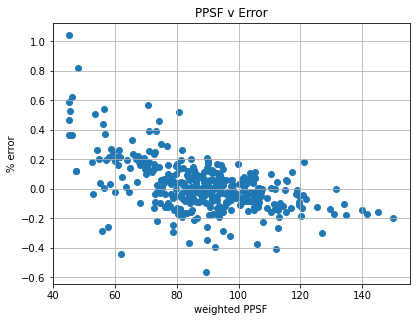

In [84]:
plt.xlabel"weighted PPSF";
plt.ylabel"% error";
plt.title"PPSF v Error";
plt.grid 1b;
plt.scatter[exec SalePrice%(GrLivArea+TotalBsmtSF*0.5) from testTable;  exec PriceDiff from testTable]
plt.show[];
//I am getting the lower PPSF incredibly wrong, need to investigate

In [85]:
select Id from testTable where (abs(PriceDiff))>.5
// most problematic Ids 

Id  
----
463 
94  
1249
633 
637 
1212
199 
1350
715 
536 


In [86]:
"Garage"
select avg abs(PriceDiff) from testTable where  GarageArea =0
select avg abs(PriceDiff) from testTable where  GarageArea >0
//I am underpenalizing for no garage
"Basement"
select avg abs(PriceDiff) from testTable where  TotalBsmtSF  >0
select avg abs(PriceDiff) from testTable where  TotalBsmtSF  =0
//Fine penalizing for no basement
"Porch"
select avg abs(PriceDiff) from testTable where  PorchSQFT  >0
select avg abs(PriceDiff) from testTable where  PorchSQFT  =0
//Porch is fine
"2nd Floor"
select avg abs(PriceDiff) from testTable where  testTable[`2ndFlrSF]>0
select avg abs(PriceDiff) from testTable where  testTable[`2ndFlrSF]=0
/2nd floor is fine
"MasVnrArea"
select avg abs(PriceDiff) from testTable where  MasVnrArea  >0
select avg abs(PriceDiff) from testTable where  MasVnrArea  =0
//MasVnrArea is fine
"WoodDeck"
select avg abs(PriceDiff) from testTable where  WoodDeckSF  >0
select avg abs(PriceDiff) from testTable where  WoodDeckSF  =0
//WoodDeck is fine
"Pool"
select avg abs(PriceDiff) from testTable where  PoolArea  >0
select avg abs(PriceDiff) from testTable where  PoolArea  =0
//inconclusive for Pool Area testing, not enough data points
"Fence"
select avg abs(PriceDiff) from testTable where  Fence  >0
select avg abs(PriceDiff) from testTable where  Fence  =0
"WoodDeck"
select avg abs(PriceDiff) from testTable where  WoodDeckSF  >0
select avg abs(PriceDiff) from testTable where  WoodDeckSF  =0
//slightly off for WoodDeck

"Garage"


PriceDiff
---------
0.23667  


PriceDiff
---------
0.119045 


"Basement"


PriceDiff
---------
0.1233938


PriceDiff
---------
0.1890225


"Porch"


PriceDiff
---------
0.1197218


PriceDiff
---------
0.1357639


"2nd Floor"


PriceDiff
---------
0.129348 


PriceDiff
---------
0.1218599


"MasVnrArea"


PriceDiff
---------
0.1069484


PriceDiff
---------
0.1358827


"WoodDeck"


PriceDiff
---------
0.1068956


PriceDiff
---------
0.1391535


"Pool"


PriceDiff
---------
0.4620936


PriceDiff
---------
0.1242711


"Fence"


PriceDiff
---------
0.1356033


PriceDiff
---------
0.1230174


"WoodDeck"


PriceDiff
---------
0.1068956


PriceDiff
---------
0.1391535


In [87]:
desc abs( abs(testTable.PriceDiff) cor/: 1_flip testTable)

BedroomAbvGr       | 0.2408998
GrLivArea          | 0.1938449
PredPrice          | 0.1752355
SalePrice          | 0.1607099
ExterCond          | 0.1569871
LotFrontage        | 0.1472904
OverallQual        | 0.1384229
PoolArea           | 0.1310183
2ndFlrSF           | 0.1246141
TotRmsAbvGrd       | 0.1244592
PorchSQFT          | 0.1227232
YearBuilt          | 0.1208915
MSSubClass75       | 0.1066956
LandContourLow     | 0.1023663
BsmtFinType2Rec    | 0.09339909
OverallCond        | 0.09113906
MSSubClass80       | 0.0892142
BldgTypeTwnhs      | 0.08921391
1stFlrSF           | 0.08882132
FullBath           | 0.08877729
TotalBsmtSF        | 0.08781462
NeighborhoodNoRidge| 0.08591925
AlleyGrvl          | 0.08486209
MSSubClass85       | 0.08205667
BsmtFinType2BLQ    | 0.07741508
RoofStyleGable     | 0.07704065
GarageYrBlt        | 0.07620317
HouseStyle1.5Fin   | 0.07470013
BsmtExposure       | 0.0735326
LandContourBnk     | 0.07292815
WoodDeckSF         | 0.07178784
NeighborhoodSawyer | 0.0

In [1]:
//My average prediction error was approximately 18%, largely resulting from colinearity,
//and the large number of zeros in many continuous features. Linear Regression would not have been my choice of algo.